<h1 align= 'center'> Customer Churn Prediction (Telecom Industry) </h1>
<h3 align= 'center'> CIMB-Apar Technologies Coding Round </h3>

## 0. Import Relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________ .
- google 'How to install ________' .

In [398]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('fivethirtyeight')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Display all Columns
pd.set_option('display.max_columns', None)

## 1. Loading the Required Data

> Both the Train and Test data are stored in a folder called "Datasets".

In [399]:
# Import the Train and Test data.
train = pd.read_csv('Datasets/Train Set.csv')
test = pd.read_excel('Datasets/Test Set.xlsx')

In [400]:
# Viewing the train dataset
print("Dimensionality of the Train dataset: ", train.shape)
train.head() ## View First 5 Rows.

Dimensionality of the Train dataset:  (3027, 21)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415.00,382-4657,no,yes,25.00,265.10,110.00,45.07,197.40,99.00,16.78,244.70,91.00,11.01,10.00,3.00,2.70,1,False.
1,OH,107,415.00,371-7191,no,yes,26.00,161.60,123.00,27.47,195.50,103.00,16.62,254.40,103.00,11.45,13.70,3.00,3.70,1,False.
2,NJ,137,415.00,358-1921,no,no,0.00,243.40,114.00,41.38,121.20,110.00,10.30,162.60,104.00,7.32,12.20,5.00,3.29,0,False.
3,OH,84,408.00,375-9999,yes,no,0.00,299.40,71.00,50.90,61.90,88.00,5.26,196.90,89.00,8.86,6.60,7.00,1.78,2,False.
4,OK,75,415.00,330-6626,yes,no,0.00,166.70,113.00,28.34,148.30,122.00,12.61,186.90,121.00,8.41,10.10,3.00,2.73,3,False.


### Data Dictionary

| Column Name | Description |
| --- | --- |
| **State** | State where the Customer is located |
| **Account Length** | How long the Customer has been holding this account |
| **Area Code** | Area Code where the Customer is located |
| **Phone** | Phone Number of the Customer |
| **Int'l Plan** | If the Customer has international plan |
| **VMail Plan** | If the Customer has voice mail plan |
| **VMail Message** | Number of Vmail messages |
| **Day Mins** | Total time spent on voice call during day |
| **Day Calls** | Number of calls during Day |
| **Day Charge** | Total charge on calls during Day |
| **Eve Mins** | Total time spent on voice call during Evening |
| **Eve Calls** | Number of calls during Evening |
| **Eve Charge** | Total charge on calls during Evening |
| **Night Mins** | Total time spent on voice call during Night |
| **Night Calls** | Number of calls during Night |
| **Night Charge** | Total charge on calls during Night |
| **Intl Mins** | Total time spent on voice call during International |
| **Intl Calls** | Number of calls during International |
| **Intl Charge** | Total charge on calls during International |
| **CustServ Calls** | Number of Customer service calls |
| **Churn?** (Target) | False, True |


## 2. Exploratory Data Analysis **+** Feature Engineering

**PROBLEM:** To Predict Whether is a Particular Customer will Churn or Not based on the information provided in the Test dataset.

In [401]:
# Information About the Data (Overview)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3027 non-null   object 
 1   Account Length  3027 non-null   int64  
 2   Area Code       3026 non-null   float64
 3   Phone           3027 non-null   object 
 4   Int'l Plan      3027 non-null   object 
 5   VMail Plan      3027 non-null   object 
 6   VMail Message   3024 non-null   float64
 7   Day Mins        3024 non-null   float64
 8   Day Calls       3026 non-null   float64
 9   Day Charge      3025 non-null   float64
 10  Eve Mins        3025 non-null   float64
 11  Eve Calls       3021 non-null   float64
 12  Eve Charge      3021 non-null   float64
 13  Night Mins      3024 non-null   float64
 14  Night Calls     3025 non-null   float64
 15  Night Charge    3023 non-null   float64
 16  Intl Mins       3023 non-null   float64
 17  Intl Calls      3026 non-null   f

In [402]:
# Statistical Description of the Data (Numerical Columns)
train.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3027.00,3026.00,3024.00,3024.00,3026.00,3025.00,3025.00,3021.00,3021.00,3024.00,3025.00,3023.00,3023.00,3026.00,3025.00,3027.00
mean,101.03,437.14,8.09,179.85,100.38,30.57,200.99,99.96,17.09,200.76,99.98,9.04,10.23,4.47,2.76,1.55
std,39.89,42.34,13.67,54.61,20.12,9.28,50.98,19.88,4.33,50.63,19.58,2.28,2.79,2.45,0.75,1.31
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,144.00,87.00,24.48,166.60,87.00,14.16,167.10,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.13,201.20,100.00,9.06,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.22,114.00,36.75,235.80,113.00,20.05,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,168.00,30.91,395.00,175.00,17.77,20.00,19.00,5.40,9.00


In [403]:
# Description of the Data (Categorical Columns)
train.describe(include= 'O')

,State,Phone,Int'l Plan,VMail Plan,Churn?
count,3027,3027,3027,3027,3027
unique,51,3027,2,2,2
top,WV,359-7521,no,no,False.
freq,91,1,2731,2190,2588


### Missing Values

- In any dataset we will initially try to find out where the missing data are. 

<AxesSubplot:>

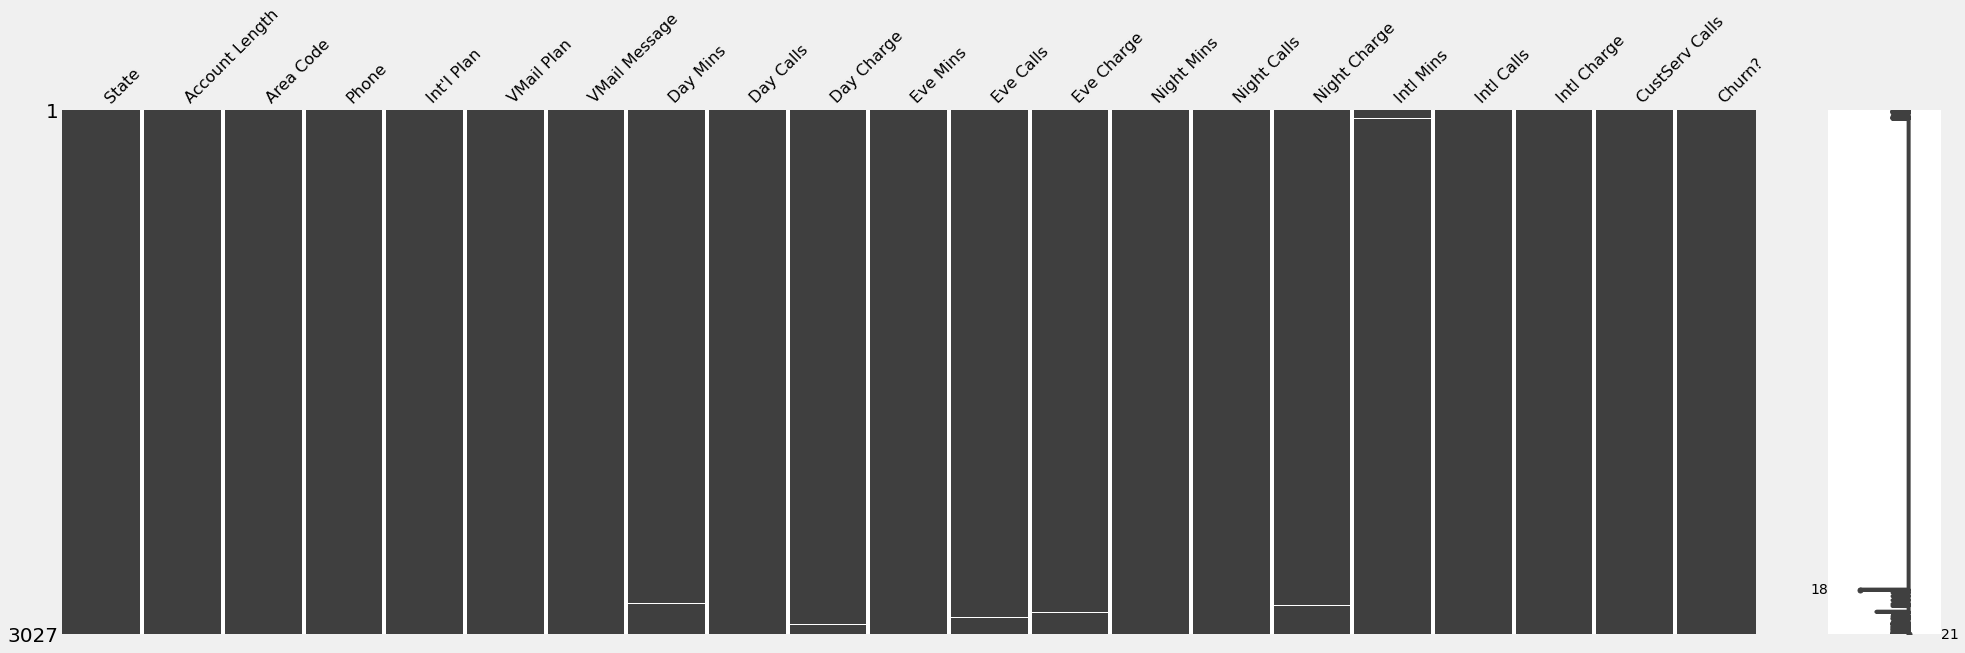

In [404]:
# Graphical Representation of Missing values
missingno.matrix(train,figsize=(30,9))

- It is important to visualise missing values, because then you will know what are the major NaN values in your dataset.
- Here we can see that there are only a few missing values overall.

In [405]:
# Another method to find missing values
train.isnull().sum()

State             0
Account Length    0
Area Code         1
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     3
Day Mins          3
Day Calls         1
Day Charge        2
Eve Mins          2
Eve Calls         6
Eve Charge        6
Night Mins        3
Night Calls       2
Night Charge      4
Intl Mins         4
Intl Calls        1
Intl Charge       2
CustServ Calls    0
Churn?            0
dtype: int64

### What Datatypes are there in the dataframe?

We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

However, sometimes the features that we consider as numerical might actually turn out to be categorical.

The next few steps will help us figure out how to process our data so our machine learning model can learn from it.
Ideally all the features will be encoded into a numerical value of some kind (maybe 0 or 1 / something else).

In [406]:
# Datatypes in the dataset
train.dtypes

State              object
Account Length      int64
Area Code         float64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message     float64
Day Mins          float64
Day Calls         float64
Day Charge        float64
Eve Mins          float64
Eve Calls         float64
Eve Charge        float64
Night Mins        float64
Night Calls       float64
Night Charge      float64
Intl Mins         float64
Intl Calls        float64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

### Exploring each of these features 
We will go through each of the columns and see which all we can use in our first models. Some of them needs more preprocessing than the others to get ready.

### **Univariate Analysis**

In [407]:
train.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415.00,382-4657,no,yes,25.00,265.10,110.00,45.07,197.40,99.00,16.78,244.70,91.00,11.01,10.00,3.00,2.70,1,False.
1,OH,107,415.00,371-7191,no,yes,26.00,161.60,123.00,27.47,195.50,103.00,16.62,254.40,103.00,11.45,13.70,3.00,3.70,1,False.
2,NJ,137,415.00,358-1921,no,no,0.00,243.40,114.00,41.38,121.20,110.00,10.30,162.60,104.00,7.32,12.20,5.00,3.29,0,False.
3,OH,84,408.00,375-9999,yes,no,0.00,299.40,71.00,50.90,61.90,88.00,5.26,196.90,89.00,8.86,6.60,7.00,1.78,2,False.
4,OK,75,415.00,330-6626,yes,no,0.00,166.70,113.00,28.34,148.30,122.00,12.61,186.90,121.00,8.41,10.10,3.00,2.73,3,False.


#### FEATURE 1: Churn?
Description: Whether the Customer Churned or Not.

Key: False. = Did not Churn, True. = Churned

***This is the variable we want our ML model to predict based off the others.***

False.    2588
True.      439
Name: Churn?, dtype: int64


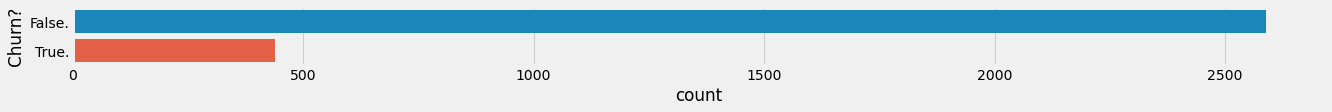

In [408]:
# How many Customers has Churned from the Company?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Churn?',data=train)
#sns.countplot(x='Churn?',data=train)             --> You can use this to get a vertical graph.

print(train['Churn?'].value_counts())             ##This will help us see the exact number along with the graph.

- So here we can see that the Customers who Churned (439) are far less than the ones who did'nt (2588). This is a clear sign of ***Data Imbalancement***. We will deal with this constraint later.

In [409]:
## Convert the Target Variable to Binary Type
train['Churn?'] = np.where(train['Churn?'] == 'False.', 0, 1)
train.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415.00,382-4657,no,yes,25.00,265.10,110.00,45.07,197.40,99.00,16.78,244.70,91.00,11.01,10.00,3.00,2.70,1,0
1,OH,107,415.00,371-7191,no,yes,26.00,161.60,123.00,27.47,195.50,103.00,16.62,254.40,103.00,11.45,13.70,3.00,3.70,1,0
2,NJ,137,415.00,358-1921,no,no,0.00,243.40,114.00,41.38,121.20,110.00,10.30,162.60,104.00,7.32,12.20,5.00,3.29,0,0
3,OH,84,408.00,375-9999,yes,no,0.00,299.40,71.00,50.90,61.90,88.00,5.26,196.90,89.00,8.86,6.60,7.00,1.78,2,0
4,OK,75,415.00,330-6626,yes,no,0.00,166.70,113.00,28.34,148.30,122.00,12.61,186.90,121.00,8.41,10.10,3.00,2.73,3,0


#### FEATURE 2: State
Description: Customer Location.

<AxesSubplot:xlabel='State', ylabel='count'>

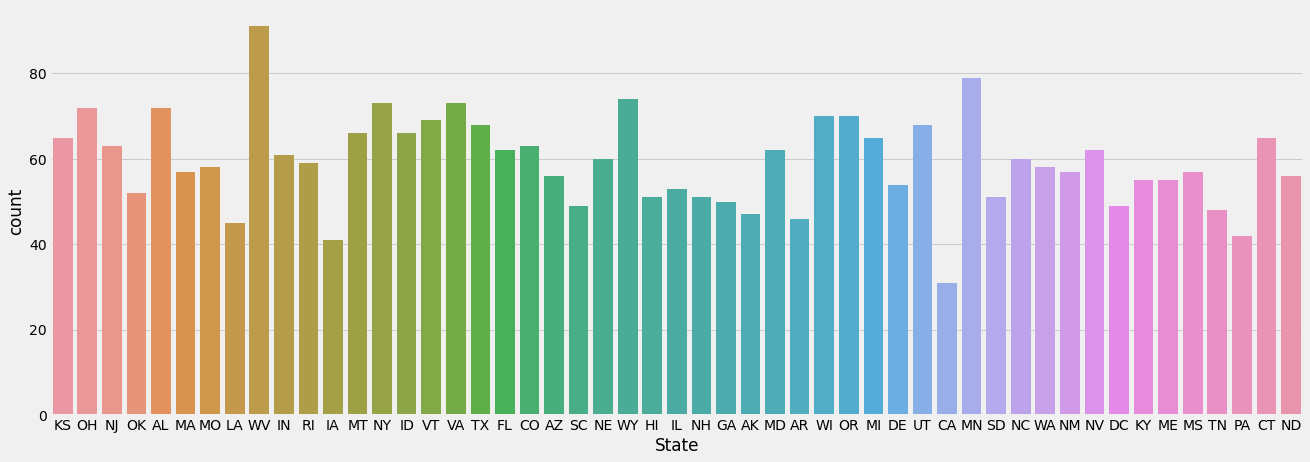

In [410]:
# Prominant States that our Customers are from?
fig = plt.figure(figsize=(20,7))
sns.countplot(x='State',data=train)     

#### FEATURE 3: Account Length
Description: Duration of time the Customer has been using the Account.

In [411]:
# How many missing values are there in Account Length
train['Account Length'].isnull().sum()

0

- #### Let's plot the Distribution
Why? We will look at the distribution of each feature to understand the spread there is actoss the dataset.

**For example:** If the values are completely outside the distribution, then we may not want to include them in the model.

<AxesSubplot:xlabel='Account Length', ylabel='Density'>

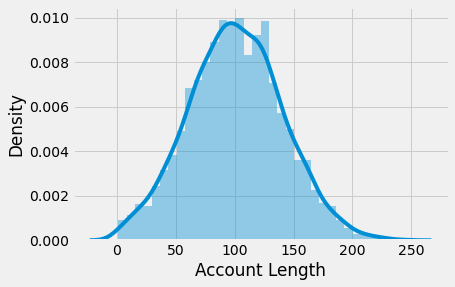

In [412]:
# Distribution of a feature.
sns.distplot(train['Account Length'])

In [413]:
print('Maximum Duration that the Customer held the Account: ',train['Account Length'].max())
print()
print('Minimum Duration that the Customer held the Account: ',train['Account Length'].min())

Maximum Duration that the Customer held the Account:  243

Minimum Duration that the Customer held the Account:  1


#### FEATURE 4: Area Code
Description: Area Code of the Customers.

In [414]:
# How many missing values are there in Area Code
train['Area Code'].isnull().sum()

1

In [415]:
train[train['Area Code'].isnull() == True]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2829,MS,130,NaN,402-5509,no,yes,26.00,257.20,108.00,43.72,224.30,122.00,19.07,204.00,118.00,9.18,12.60,4.00,3.40,1,0


> **There are many ways to Fill this Particular Missing Value. What we will do if fill using the Most Frequent (Mode) value for the State MS.**

In [416]:
## Most Frequent Value for MS.
MS_State = train[train['State'] == "MS"]
MS_State['Area Code'].mode()

0   415.00
dtype: float64

In [417]:
## Fill the missing value using the Mode Value
train['Area Code'].fillna(415.0, inplace= True)

415.00    1508
510.00     761
408.00     758
Name: Area Code, dtype: int64


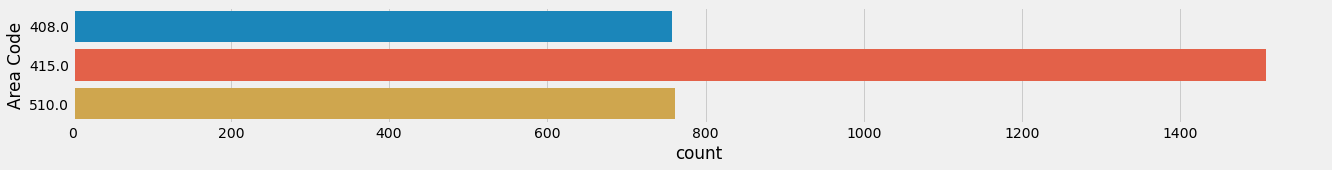

In [418]:
# Area Code of Customers?
fig = plt.figure(figsize=(20,2))
sns.countplot(y="Area Code", data=train)

print(train["Area Code"].value_counts()) 

#### FEATURE 5: Phone
Description: Phone Number of the Customer

In [419]:
# Checking For Duplicate Numbers
train['Phone'].duplicated().any()

False

- Since there are no Duplicated we have no further use of this column. So we will be dropping them.

In [420]:
## Dropping the un-wanted Column.
train.drop('Phone', inplace= True, axis= 1)

#### FEATURE 6: International Plan
Description: Understanding if the Customer has International Plan

In [421]:
# How many missing values are there in International Plan
train["Int'l Plan"].isnull().sum()

0

no     2731
yes     296
Name: Int'l Plan, dtype: int64


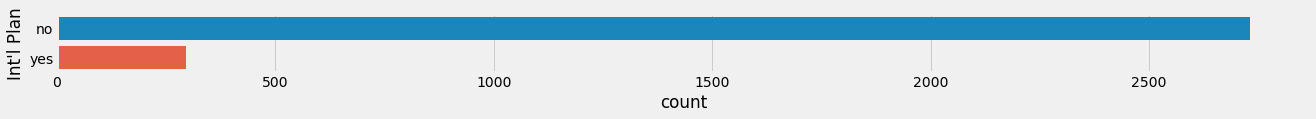

In [422]:
# How many Customers have International Plans?
fig = plt.figure(figsize=(20,1))
sns.countplot(y="Int'l Plan", data=train)

print(train["Int'l Plan"].value_counts())  

#### FEATURE 7: Voice Mail Plan
Description: Does the Customer have Voice Mail Plan?

In [423]:
# How many missing values are there in Voice Mail Plan
train["VMail Plan"].isnull().sum()

0

no     2190
yes     837
Name: VMail Plan, dtype: int64


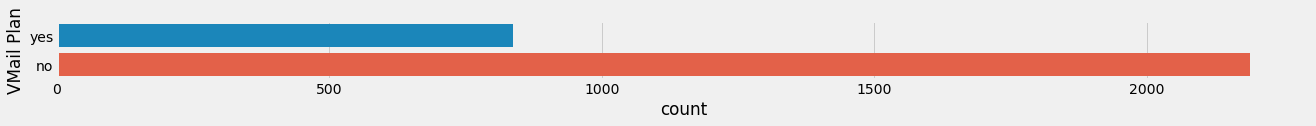

In [424]:
# How many Customers have Voice Mail Plan?
fig = plt.figure(figsize=(20,1))
sns.countplot(y="VMail Plan", data=train)

print(train["VMail Plan"].value_counts())  

### Now let us compare the International and Voice Mail Plan Variables with the Churn Variable and see how it looks.

- This can be done only if both are binary (0 and 1).

In [425]:
## Convert the Variables to Binary Type
train["Int'l Plan"] = np.where(train["Int'l Plan"] == 'yes', 1, 0)
train["VMail Plan"] = np.where(train["VMail Plan"] == 'yes', 1, 0)

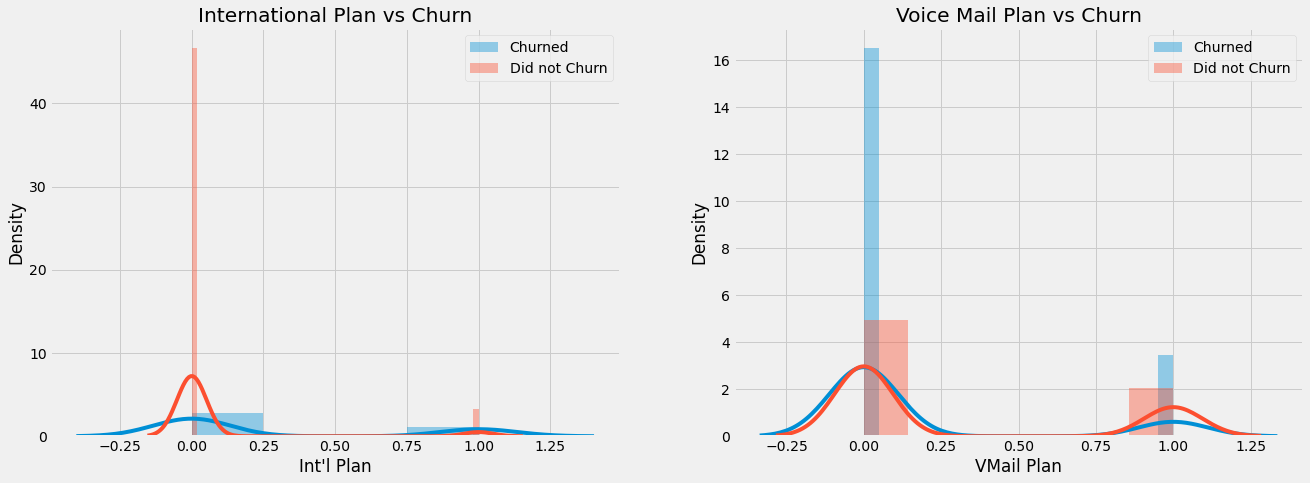

In [426]:
fig = plt.figure(figsize=(20, 7))


plt.subplot(1,2,1)
sns.distplot(train.loc[train['Churn?'] == 1]["Int'l Plan"], label= 'Churned')
sns.distplot(train.loc[train['Churn?'] == 0]["Int'l Plan"], label= 'Did not Churn')
plt.legend()
plt.title('International Plan vs Churn')

plt.subplot(1,2,2)
sns.distplot(train.loc[train['Churn?'] == 1]["VMail Plan"], label= 'Churned')
sns.distplot(train.loc[train['Churn?'] == 0]["VMail Plan"], label= 'Did not Churn')
plt.legend()

plt.title('Voice Mail Plan vs Churn')
plt.show()

- So from the above plots we can conclude that:

    1. The ratio of Churners for the Customers who have an International Plan is higher than those who don't.
    2. The ratio of Churners for the Customers who do not have a Voice Mail Plan is higher than those who do.

#### FEATURE 8: Voice Mail Messages
Description: Number of Voice Mail Messages

In [427]:
# How many missing values are there in Voice Mail Message
train["VMail Message"].isnull().sum()

3

In [428]:
train[train['VMail Message'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
12,IA,168,408.00,0,0,NaN,128.80,96.00,21.90,104.90,71.00,8.92,141.10,128.00,6.35,11.20,2.00,3.02,1,0
2981,NY,46,415.00,0,0,NaN,122.20,67.00,20.77,167.20,62.00,14.21,194.80,98.00,8.77,9.70,6.00,2.62,1,0
3004,RI,76,415.00,0,0,NaN,171.10,78.00,29.09,257.20,83.00,21.86,91.60,92.00,4.12,16.20,3.00,4.37,1,0


- Here we can fill the Missing Values with **0** as these 3 Customers don't have any Voice Mail Plan.

In [429]:
## Filling Missing Values with 0
train['VMail Message'].fillna(0, inplace= True)

<AxesSubplot:xlabel='VMail Message', ylabel='Density'>

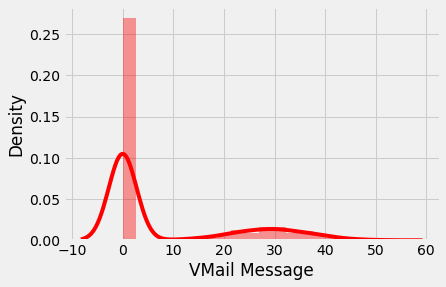

In [430]:
# Distribution of a Voice Mail Messages.
sns.distplot(train['VMail Message'], color= 'r')

- We can see here that a majority of the Customers do not have any Voice Mail Messages. This can be Considered as a Outlier.

In [431]:
train.groupby('Churn?')['VMail Message'].mean()

Churn?
0   8.55
1   5.33
Name: VMail Message, dtype: float64

- We can see that the Customers who haven't churned have received more number of VMail Messages on an Average.

#### FEATURE 9: Day Minutes
Description: Total time spent on Voice Call During Day

In [432]:
# How many missing values are there in Day Minutes
train["Day Mins"].isnull().sum()

3

In [433]:
train[train['Day Mins'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
46,MI,65,415.00,0,0,0.00,NaN,120.00,35.92,162.60,122.00,13.82,134.70,118.00,6.06,13.20,5.00,3.56,3,0
2769,WI,137,510.00,0,0,0.00,NaN,81.00,26.44,133.10,NaN,NaN,253.10,77.00,11.39,9.10,2.00,2.46,1,0
2851,NH,95,510.00,0,0,0.00,NaN,109.00,24.23,176.10,107.00,14.97,189.60,88.00,8.53,8.20,3.00,2.21,2,0


- Here we can fill the Missing Values by using the following Steps:
    - First we find the Charge for 1 Minute for that specific State.
    - Next find the Total Minutes of the Customer by Dividing the *Day Charge* with *Charge for 1 Minute*.
    - Then Create a loop for which we fill the Missing Values with the Total Minutes.

In [434]:
## Obtaining all Details of MI State with 415 Area Code
Area_Code = train[train['Area Code'] == 415.0]
MI_State = Area_Code[Area_Code['State'] == 'MI']

## Obtaining all Details of WI and NH States with 510 Area Code
Area_Code_510 = train[train['Area Code'] == 510.0]
WI_State = Area_Code_510[Area_Code_510['State'] == 'WI']
NH_State = Area_Code_510[Area_Code_510['State'] == 'NH']


### Filling Missing Values for each State

In [435]:
MI_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
46,MI,65,415.00,0,0,0.00,NaN,120.00,35.92,162.60,122.00,13.82,134.70,118.00,6.06,13.20,5.00,3.56,3,0
142,MI,157,415.00,0,1,28.00,192.60,107.00,32.74,195.50,74.00,16.62,109.70,139.00,4.94,6.80,5.00,1.84,3,0
145,MI,140,415.00,0,0,0.00,231.90,101.00,39.42,160.10,94.00,13.61,110.40,98.00,4.97,14.30,6.00,3.86,3,0
163,MI,62,415.00,0,0,0.00,98.90,103.00,16.81,135.40,122.00,11.51,236.60,82.00,10.65,12.20,1.00,3.29,1,0
177,MI,127,415.00,0,0,0.00,202.10,103.00,34.36,229.40,86.00,19.50,195.20,113.00,8.78,11.50,3.00,3.11,2,0


In [436]:
## Charge of a Call for 1 Minute
charge_MI = MI_State['Day Charge'].iloc[1]/MI_State['Day Mins'].iloc[1]
np.round(charge_MI,2)

0.17

In [437]:
for i in range(0,len(train)):
    if train['State'][i] == 'MI':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Day Charge'][i]/charge_MI,2)
            train['Day Mins'][i] = value
    else:
        pass

In [438]:
WI_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
44,WI,64,510.00,0,0,0.00,154.00,67.00,26.18,225.80,118.00,19.19,265.30,86.00,11.94,3.50,3.00,0.95,1,0
292,WI,94,510.00,0,0,0.00,177.10,112.00,30.11,194.00,112.00,16.49,146.70,108.00,6.60,5.90,4.00,1.59,1,0
294,WI,96,510.00,0,1,18.00,172.70,86.00,29.36,133.40,113.00,11.34,259.50,70.00,11.68,9.80,3.00,2.65,1,0
394,WI,16,510.00,0,0,0.00,229.60,78.00,39.03,205.70,108.00,17.48,166.20,91.00,7.48,10.80,2.00,2.92,0,1
546,WI,69,510.00,1,0,0.00,279.80,90.00,47.57,248.70,91.00,21.14,171.00,118.00,7.69,8.40,10.00,2.27,2,1


In [439]:
## Charge of a Call for 1 WInute
charge_WI = WI_State['Day Charge'].iloc[1]/WI_State['Day Mins'].iloc[1]
np.round(charge_WI,2)

0.17

In [440]:
NH_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
31,NH,75,510.00,0,0,0.00,226.10,105.00,38.44,201.50,107.00,17.13,246.20,98.00,11.08,10.30,5.00,2.78,1,0
387,NH,54,510.00,0,0,0.00,210.50,102.00,35.79,204.50,83.00,17.38,127.80,53.00,5.75,8.50,5.00,2.30,1,0
1215,NH,139,510.00,0,0,0.00,221.30,140.00,37.62,157.80,89.00,13.41,192.50,89.00,8.66,11.30,6.00,3.05,1,0
1323,NH,111,510.00,0,0,0.00,197.10,117.00,33.51,227.80,128.00,19.36,214.00,101.00,9.63,9.30,11.00,2.51,0,0
1476,NH,121,510.00,0,1,35.00,193.80,62.00,32.95,197.60,97.00,16.80,218.80,95.00,9.85,5.90,4.00,1.59,0,0


In [441]:
## Charge of a Call for 1 NHnute
charge_NH = NH_State['Day Charge'].iloc[1]/NH_State['Day Mins'].iloc[1]
np.round(charge_NH,2)

0.17

In [442]:
for i in range(0,len(train)):
    if train['State'][i] == 'WI':
        if (train['Area Code'][i] == 510.0):
            value = np.round(train['Day Charge'][i]/charge_WI,2)
            train['Day Mins'][i] = value
    elif  train['State'][i] == 'NH':
        if (train['Area Code'][i] == 510.0):
            value = np.round(train['Day Charge'][i]/charge_NH,2)
            train['Day Mins'][i] = value
    else:
        pass

<AxesSubplot:xlabel='Day Mins', ylabel='Density'>

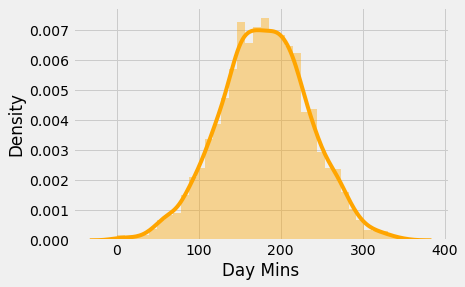

In [443]:
# Distribution of a Day Minutes.
sns.distplot(train['Day Mins'], color= 'orange')

#### FEATURE 10: Day Calls
Description: Number of Calls During the Day

In [444]:
# How many missing values are there in Day Calls
train["Day Calls"].isnull().sum()

1

In [445]:
train[train['Day Calls'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3025,NH,123,415.00,0,1,22.00,197.60,NaN,33.59,80.00,86.00,6.80,120.80,82.00,5.44,15.60,12.00,4.21,2,0


In [446]:
## Average Number of Calls received by NH State with Area Code 415
NH_State = train[train['State'] == 'NH']
Average_Calls = NH_State[NH_State['Area Code'] == 415.0]

print('Average Calls Received: ',np.round(Average_Calls['Day Calls'].mean(), 1))

Average Calls Received:  93.4


In [447]:
# Fill Missing Value with the Average Number of Calls 
train['Day Calls'].fillna(93.4, inplace= True)

<AxesSubplot:xlabel='Day Calls', ylabel='Density'>

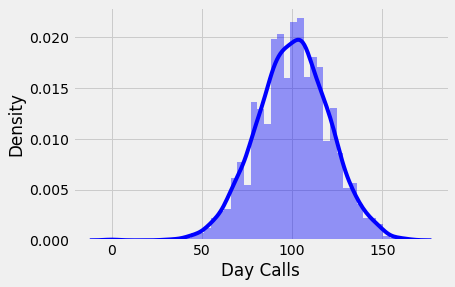

In [448]:
# Distribution of a Day Calls.
sns.distplot(train['Day Calls'], color= 'blue')

#### FEATURE 11: Day Charge
Description: Total charge on Calls during Day

In [449]:
# How many missing values are there in Day Charges
train["Day Charge"].isnull().sum()

2

In [450]:
train[train['Day Charge'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
7,MO,147,415.00,1,0,0.00,157.00,79.00,NaN,103.10,94.00,8.76,211.80,96.00,9.53,7.10,6.00,1.92,0,0
2972,MT,147,415.00,0,1,35.00,197.30,134.00,NaN,141.10,99.00,11.99,212.10,90.00,9.54,10.10,4.00,2.73,2,1


In [451]:
## Obtaining all Details of MO and MT States with 415 Area Code
Area_Code = train[train['Area Code'] == 415.0]
MO_State = Area_Code[Area_Code['State'] == 'MO']
MT_State = Area_Code[Area_Code['State'] == 'MT']

- The Main reason is that in order to obtain the Charge of the Day it is enough to multiply the Charge of 1 Minute with the Total Minutes spent on Call for both MO and MT States.

In [452]:
MO_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
7,MO,147,415.00,1,0,0.00,157.00,79.00,NaN,103.10,94.00,8.76,211.80,96.00,9.53,7.10,6.00,1.92,0,0
28,MO,20,415.00,0,0,0.00,190.00,109.00,32.30,258.20,84.00,21.95,181.50,102.00,8.17,6.30,6.00,1.70,0,0
205,MO,66,415.00,0,1,36.00,106.70,76.00,18.14,209.80,77.00,17.83,190.40,117.00,8.57,12.10,2.00,3.27,1,0
226,MO,123,415.00,0,0,0.00,206.90,85.00,35.17,244.70,78.00,20.80,221.50,136.00,9.97,7.70,2.00,2.08,3,0
305,MO,196,415.00,0,0,0.00,234.00,109.00,39.78,249.50,114.00,21.21,173.10,70.00,7.79,9.10,5.00,2.46,2,0


In [453]:
## Charge of a Call for 1 Minute
charge_MO = MO_State['Day Charge'].iloc[1]/MO_State['Day Mins'].iloc[1]
np.round(charge_MO,2)

0.17

> **Thus the Charge of 1 Minute is 0.17**

In [454]:
MT_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
96,MT,73,415.00,0,0,0.00,160.10,110.00,27.22,213.30,72.00,18.13,174.10,72.00,7.83,13.00,4.00,3.51,0,0
193,MT,94,415.00,0,0,0.00,137.50,118.00,23.38,203.20,88.00,17.27,150.00,131.00,6.75,13.40,2.00,3.62,0,0
280,MT,143,415.00,0,0,0.00,172.30,97.00,29.29,174.00,108.00,14.79,188.20,119.00,8.47,13.00,4.00,3.51,2,0
331,MT,54,415.00,0,0,0.00,272.60,83.00,46.34,248.70,74.00,21.14,197.40,111.00,8.88,9.50,2.00,2.57,1,1
631,MT,169,415.00,0,0,0.00,100.80,112.00,17.14,230.00,69.00,19.55,193.60,95.00,8.71,9.50,2.00,2.57,0,0


In [455]:
## Charge of a Call for 1 Minute
charge_MT = MT_State['Day Charge'].iloc[0]/MT_State['Day Mins'].iloc[0]
np.round(charge_MT,2)

0.17

> **Thus the Charge of 1 Minute is 0.17**

#### Since both the States have the same Charge/Minute we can fill in the missing value using that.

In [456]:
for i in range(0,len(train)):
    if train['State'][i] == 'MO':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Day Mins'][i]*0.17,2)
            train['Day Charge'][i] = value
    elif  train['State'][i] == 'MT':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Day Mins'][i]*0.17,2)
            train['Day Charge'][i] = value
    else:
        pass

<AxesSubplot:xlabel='Day Charge', ylabel='Density'>

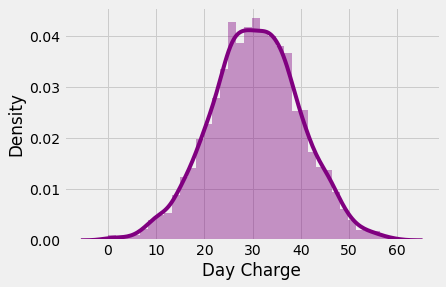

In [457]:
# Distribution of a Day Charge.
sns.distplot(train['Day Charge'], color= 'purple')

#### FEATURE 12: Evening Minutes
Description: Total time spent on Voice Call during Evening

In [458]:
# How many missing values are there in Evening Minutes
train["Eve Mins"].isnull().sum()

2

In [459]:
train[train['Eve Mins'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2938,NE,31,415.00,0,0,0.00,97.50,129.00,16.58,NaN,78.00,22.13,88.70,100.00,3.99,7.00,5.00,1.89,1,0
2985,IN,7,415.00,0,0,0.00,206.70,87.00,35.14,NaN,83.00,23.89,158.50,77.00,7.13,11.00,5.00,2.97,3,0


In [460]:
## Obtaining all Details of NE and IN States with 415 Area Code
Area_Code = train[train['Area Code'] == 415.0]
NE_State = Area_Code[Area_Code['State'] == 'NE']
IN_State = Area_Code[Area_Code['State'] == 'IN']

In [461]:
NE_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
25,NE,174,415.00,0,0,0.00,124.30,76.00,21.13,277.10,112.00,23.55,250.70,115.00,11.28,15.50,5.00,4.19,3,0
130,NE,90,415.00,0,0,0.00,145.50,92.00,24.74,217.70,114.00,18.50,146.90,123.00,6.61,10.90,2.00,2.94,3,0
151,NE,117,415.00,0,0,0.00,102.80,119.00,17.48,206.70,91.00,17.57,299.00,105.00,13.46,10.10,7.00,2.73,1,0
175,NE,94,415.00,0,0,0.00,252.60,104.00,42.94,169.00,125.00,14.37,170.90,106.00,7.69,11.10,7.00,3.00,2,0
412,NE,85,415.00,0,0,0.00,259.80,85.00,44.17,242.30,117.00,20.60,168.80,72.00,7.60,5.40,1.00,1.46,0,0


In [462]:
## Charge of a Call for 1 Minute
charge_NE = NE_State['Eve Charge'].iloc[0]/NE_State['Eve Mins'].iloc[0]
np.round(charge_NE,2)

0.08

> Thus charge for 1 minute in NE State is 0.08

In [463]:
IN_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415.00,0,0,0.00,129.10,137.00,21.95,228.50,83.00,19.42,208.80,111.00,9.40,12.70,6.00,3.43,4,1
206,IN,122,415.00,0,0,0.00,243.80,98.00,41.45,83.90,72.00,7.13,179.80,84.00,8.09,13.70,8.00,3.70,2,0
225,IN,65,415.00,0,0,0.00,213.40,111.00,36.28,234.50,94.00,19.93,250.10,123.00,11.25,2.70,4.00,0.73,1,0
242,IN,36,415.00,0,0,0.00,253.40,77.00,43.08,182.40,151.00,15.50,275.80,103.00,12.41,8.40,2.00,2.27,1,0
383,IN,117,415.00,1,1,22.00,196.00,82.00,33.32,322.70,82.00,27.43,225.60,120.00,10.15,3.70,5.00,1.00,1,0


In [464]:
## Charge of a Call for 1 Minute
charge_IN = IN_State['Eve Charge'].iloc[0]/IN_State['Eve Mins'].iloc[0]
np.round(charge_IN,2)

0.08

> Thus charge for 1 minute in IN State is 0.08

In [465]:
for i in range(0,len(train)):
    if train['State'][i] == 'NE':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Eve Charge'][i]/charge_NE,2)
            train['Eve Mins'][i] = value
    elif  train['State'][i] == 'IN':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Eve Charge'][i]/charge_IN,2)
            train['Eve Mins'][i] = value
    else:
        pass

<AxesSubplot:xlabel='Eve Mins', ylabel='Density'>

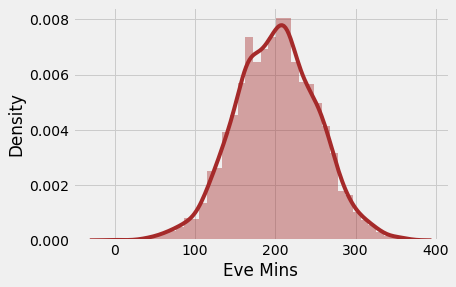

In [466]:
# Distribution of a Eve Minutes.
sns.distplot(train['Eve Mins'], color= 'brown')

#### FEATURE 13: Evening Calls
Description: Number of Calls during Evening

In [467]:
# How many missing values are there in Eve Calls
train["Eve Calls"].isnull().sum()

6

In [468]:
train[train['Eve Calls'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
21,CO,77,408.00,0,0,0.00,62.40,89.00,10.61,169.90,NaN,14.44,209.60,64.00,9.43,5.70,6.00,1.54,5,1
50,IA,52,408.00,0,0,0.00,191.90,108.00,32.62,269.80,NaN,22.93,236.80,87.00,10.66,7.80,5.00,2.11,3,0
2769,WI,137,510.00,0,0,0.00,155.51,81.00,26.44,133.10,NaN,NaN,253.10,77.00,11.39,9.10,2.00,2.46,1,0
2772,WI,161,408.00,0,0,0.00,154.70,84.00,26.30,177.80,NaN,15.11,172.90,90.00,7.78,5.90,2.00,1.59,4,1
2931,KS,68,415.00,0,0,0.00,207.60,68.00,35.29,251.60,NaN,21.39,191.60,100.00,8.62,10.90,6.00,2.94,2,0
3010,FL,185,408.00,0,0,0.00,55.60,97.00,9.45,288.70,NaN,24.54,111.20,110.00,5.00,12.10,3.00,3.27,2,0


In [469]:
## Average Number of Calls received by the States with respective Area Codes
CO_State = train[train['State'] == 'CO']
Average_Calls_CO = CO_State[CO_State['Area Code'] == 408.0]

print('Average Calls CO Received: ',np.round(Average_Calls_CO['Eve Calls'].mean(), 1))

Average Calls CO Received:  96.7


In [470]:
IA_State = train[train['State'] == 'IA']
Average_Calls_IA = IA_State[IA_State['Area Code'] == 408.0]

print('Average Calls IA Received: ',np.round(Average_Calls_IA['Eve Calls'].mean(), 1))

Average Calls IA Received:  94.9


In [471]:
WI_State = train[train['State'] == 'WI']
Average_Calls_WI5 = WI_State[WI_State['Area Code'] == 510.0]

print('Average Calls WI510 Received: ',np.round(Average_Calls_WI5['Eve Calls'].mean(), 1))



WI4_State = train[train['State'] == 'WI']
Average_Calls_WI4 = WI4_State[WI4_State['Area Code'] == 408.0]

print('Average Calls WI4 Received: ',np.round(Average_Calls_WI4['Eve Calls'].mean(), 1))

Average Calls WI510 Received:  104.2
Average Calls WI4 Received:  91.7


In [472]:
KS_State = train[train['State'] == 'KS']
Average_Calls_KS = KS_State[KS_State['Area Code'] == 415.0]

print('Average Calls KS Received: ',np.round(Average_Calls_KS['Eve Calls'].mean(), 1))

Average Calls KS Received:  100.1


In [473]:
FL_State = train[train['State'] == 'FL']
Average_Calls_FL = FL_State[FL_State['Area Code'] == 408.0]

print('Average Calls FL Received: ',np.round(Average_Calls_FL['Eve Calls'].mean(), 1))

Average Calls FL Received:  109.7


In [474]:
## Filling Missing Values with the Average Calls Received for respective States
train['Eve Calls'].loc[21] = 96.7       
train['Eve Calls'].loc[50]= 94.9

train['Eve Calls'].loc[2769] = 104.2        ## WI State with Area Code 510
train['Eve Calls'].loc[2772] = 91.7         ## WI State with Area Code 408

train['Eve Calls'].loc[2931] = 100.1
train['Eve Calls'].loc[3010] = 109.7

<AxesSubplot:xlabel='Eve Calls', ylabel='Density'>

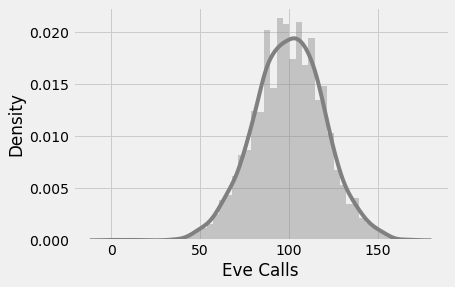

In [475]:
# Distribution of a Eve Charge.
sns.distplot(train['Eve Calls'], color= 'gray')

#### FEATURE 14: Evening Charge
Description: Total Charge on Calls during Evening

In [476]:
# How many missing values are there in Evening Charges
train["Eve Charge"].isnull().sum()

6

In [477]:
train[train['Eve Charge'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
11,RI,74,415.00,0,0,0.00,187.70,127.00,31.91,163.40,148.00,NaN,196.00,94.00,8.82,9.10,5.00,2.46,0,0
2769,WI,137,510.00,0,0,0.00,155.51,81.00,26.44,133.10,104.20,NaN,253.10,77.00,11.39,9.10,2.00,2.46,1,0
2852,MN,90,408.00,0,0,0.00,142.40,126.00,24.21,126.20,118.00,NaN,274.20,71.00,12.34,4.60,4.00,1.24,1,0
2903,DE,97,415.00,0,1,32.00,183.40,94.00,31.18,269.10,120.00,NaN,203.50,38.00,9.16,6.70,4.00,1.81,5,0
2921,NE,80,415.00,0,0,0.00,127.80,67.00,21.73,NaN,112.00,NaN,197.30,63.00,8.88,15.90,2.00,4.29,2,0
3023,MT,103,510.00,0,1,35.00,110.50,101.00,18.79,208.30,81.00,NaN,87.40,77.00,3.93,13.90,2.00,3.75,4,1


In [478]:
## Obtaining all Details of RI, DE, and NE States with 415 Area Code
Area_Code = train[train['Area Code'] == 415.0]
RI_State = Area_Code[Area_Code['State'] == 'RI']
DE_State = Area_Code[Area_Code['State'] == 'DE']
NE_State = Area_Code[Area_Code['State'] == 'NE']

In [479]:
## Obtaining all Details of MN State with 408 Area Code
Area_Code2 = train[train['Area Code'] == 408.0]
MN_State = Area_Code2[Area_Code2['State'] == 'MN']

In [480]:
## Obtaining all Details of WI and MT States with 510 Area Code
Area_Code3 = train[train['Area Code'] == 510.0]
WI_State = Area_Code3[Area_Code3['State'] == 'WI']
MT_State = Area_Code3[Area_Code3['State'] == 'MT']

- The Main reason is that in order to obtain the Charge of the Eveing it is enough to multiply the Charge of 1 Minute with the Total Minutes spent on Call for the States.

#### RI, DE and NE States

In [481]:
RI_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
11,RI,74,415.00,0,0,0.00,187.70,127.00,31.91,163.40,148.00,NaN,196.00,94.00,8.82,9.10,5.00,2.46,0,0
153,RI,56,415.00,0,0,0.00,226.00,112.00,38.42,248.50,118.00,21.12,140.50,142.00,6.32,6.90,11.00,1.86,1,0
246,RI,107,415.00,0,1,37.00,60.00,102.00,10.20,102.20,80.00,8.69,261.80,106.00,11.78,11.10,3.00,3.00,0,0
317,RI,119,415.00,0,1,29.00,117.80,66.00,20.03,256.80,114.00,21.83,147.60,76.00,6.64,7.60,3.00,2.05,3,0
493,RI,129,415.00,0,1,33.00,119.60,104.00,20.33,278.70,88.00,23.69,263.40,175.00,11.85,5.90,2.00,1.59,2,0


In [482]:
## Charge of a Call for 1 Minute
charge_RI = RI_State['Eve Charge'].iloc[1]/RI_State['Eve Mins'].iloc[1]
np.round(charge_RI,2)

0.08

In [483]:
DE_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
165,DE,92,415.00,0,1,33.00,243.10,92.00,41.33,213.80,92.00,18.17,228.70,104.00,10.29,12.10,2.00,3.27,2,0
284,DE,71,415.00,0,0,0.00,197.90,108.00,33.64,181.50,109.00,15.43,281.40,56.00,12.66,6.70,5.00,1.81,3,0
361,DE,148,415.00,0,0,0.00,124.40,83.00,21.15,179.70,81.00,15.27,253.00,99.00,11.39,11.30,6.00,3.05,0,0
415,DE,113,415.00,0,0,0.00,239.70,47.00,40.75,282.90,110.00,24.05,238.40,88.00,10.73,8.70,3.00,2.35,2,1
513,DE,30,415.00,0,1,30.00,217.40,74.00,36.96,213.80,86.00,18.17,227.20,104.00,10.22,6.60,3.00,1.78,0,0


In [484]:
## Charge of a Call for 1 Minute
charge_DE = DE_State['Eve Charge'].iloc[0]/DE_State['Eve Mins'].iloc[0]
np.round(charge_DE,2)

0.08

In [485]:
NE_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
25,NE,174,415.00,0,0,0.00,124.30,76.00,21.13,277.10,112.00,23.55,250.70,115.00,11.28,15.50,5.00,4.19,3,0
130,NE,90,415.00,0,0,0.00,145.50,92.00,24.74,217.68,114.00,18.50,146.90,123.00,6.61,10.90,2.00,2.94,3,0
151,NE,117,415.00,0,0,0.00,102.80,119.00,17.48,206.74,91.00,17.57,299.00,105.00,13.46,10.10,7.00,2.73,1,0
175,NE,94,415.00,0,0,0.00,252.60,104.00,42.94,169.08,125.00,14.37,170.90,106.00,7.69,11.10,7.00,3.00,2,0
412,NE,85,415.00,0,0,0.00,259.80,85.00,44.17,242.39,117.00,20.60,168.80,72.00,7.60,5.40,1.00,1.46,0,0


In [486]:
## Charge of a Call for 1 Minute
charge_NE = NE_State['Eve Charge'].iloc[0]/NE_State['Eve Mins'].iloc[0]
np.round(charge_NE,2)

0.08

In [487]:
## Filling Values for RI, DE and NE States
for i in range(0,len(train)):
    if train['State'][i] == 'RI':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Eve Mins'][i]*charge_RI,2)
            train['Eve Charge'][i] = value
    elif  train['State'][i] == 'DE':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Eve Mins'][i]*charge_DE,2)
            train['Eve Charge'][i] = value
    elif  train['State'][i] == 'NE':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Eve Mins'][i]*charge_NE,2)
            train['Eve Charge'][i] = value
    else:
        pass

#### MN State with Area Code 408

In [488]:
MN_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
67,MN,113,408.00,1,0,0.00,125.20,93.00,21.28,206.40,119.00,17.54,129.30,139.00,5.82,8.30,8.00,2.24,0,0
1079,MN,158,408.00,0,0,0.00,209.90,112.00,35.68,221.30,82.00,18.81,210.00,93.00,9.45,8.20,3.00,2.21,1,0
1147,MN,95,408.00,0,1,32.00,262.20,123.00,44.57,165.20,82.00,14.04,194.30,57.00,8.74,10.60,5.00,2.86,0,0
1281,MN,109,408.00,0,0,0.00,162.60,138.00,27.64,154.00,109.00,13.09,209.70,118.00,9.44,11.50,4.00,3.11,0,0
1507,MN,116,408.00,0,0,0.00,197.90,84.00,33.64,168.10,113.00,14.29,239.80,145.00,10.79,12.00,6.00,3.24,1,0


In [489]:
## Charge of a Call for 1 Minute
charge_MN = MN_State['Eve Charge'].iloc[0]/MN_State['Eve Mins'].iloc[0]
np.round(charge_MN,2)

0.08

In [490]:
for i in range(0,len(train)):
    if train['State'][i] == 'MN':
        if (train['Area Code'][i] == 408.0):
            value = np.round(train['Eve Mins'][i]*charge_MN,2)
            train['Eve Charge'][i] = value
    else:
        pass

#### WI and MT State with Area Code 510

In [491]:
WI_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
44,WI,64,510.00,0,0,0.00,153.98,67.00,26.18,225.80,118.00,19.19,265.30,86.00,11.94,3.50,3.00,0.95,1,0
292,WI,94,510.00,0,0,0.00,177.10,112.00,30.11,194.00,112.00,16.49,146.70,108.00,6.60,5.90,4.00,1.59,1,0
294,WI,96,510.00,0,1,18.00,172.69,86.00,29.36,133.40,113.00,11.34,259.50,70.00,11.68,9.80,3.00,2.65,1,0
394,WI,16,510.00,0,0,0.00,229.57,78.00,39.03,205.70,108.00,17.48,166.20,91.00,7.48,10.80,2.00,2.92,0,1
546,WI,69,510.00,1,0,0.00,279.80,90.00,47.57,248.70,91.00,21.14,171.00,118.00,7.69,8.40,10.00,2.27,2,1


In [492]:
## Charge of a Call for 1 Minute
charge_WI = WI_State['Eve Charge'].iloc[0]/WI_State['Eve Mins'].iloc[0]
np.round(charge_WI,2)

0.08

In [493]:
MT_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
13,MT,95,510.00,0,0,0.00,156.60,88.00,26.62,247.60,75.00,21.05,192.30,115.00,8.65,12.30,5.00,3.32,3,0
334,MT,66,510.00,0,0,0.00,201.30,95.00,34.22,152.80,66.00,12.99,233.20,101.00,10.49,7.50,4.00,2.03,1,0
435,MT,58,510.00,0,1,29.00,240.40,80.00,40.87,118.90,91.00,10.11,164.20,108.00,7.39,11.20,3.00,3.02,1,0
667,MT,27,510.00,0,0,0.00,193.80,102.00,32.95,118.90,104.00,10.11,135.90,124.00,6.12,9.20,3.00,2.48,0,0
703,MT,163,510.00,0,1,23.00,160.00,104.00,27.20,189.40,64.00,16.10,229.90,118.00,10.35,10.40,7.00,2.81,1,0


In [494]:
## Charge of a Call for 1 Minute
charge_MT = MT_State['Eve Charge'].iloc[0]/MT_State['Eve Mins'].iloc[0]
np.round(charge_MT,2)

0.09

In [495]:
for i in range(0,len(train)):
    if train['State'][i] == 'WI':
        if (train['Area Code'][i] == 510.0):
            value = np.round(train['Eve Mins'][i]*charge_WI,2)
            train['Eve Charge'][i] = value
    elif  train['State'][i] == 'MT':
        if (train['Area Code'][i] == 510.0):
            value = np.round(train['Eve Mins'][i]*charge_MT,2)
            train['Eve Charge'][i] = value
    else:
        pass

<AxesSubplot:xlabel='Eve Charge', ylabel='Density'>

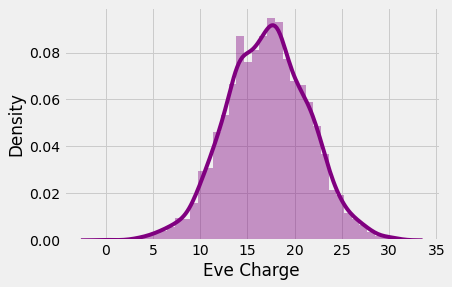

In [496]:
# Distribution of a Day Charge.
sns.distplot(train['Eve Charge'], color= 'purple')

#### FEATURE 15: Night Mins
Description: Total time spent on Voice Call during Night

In [497]:
# How many missing values are there in Night Minutes
train["Night Mins"].isnull().sum()

3

In [498]:
train[train['Night Mins'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2959,NY,125,415.00,0,0,0.00,233.30,65.00,39.66,209.80,93.00,17.83,NaN,109.00,9.48,9.10,4.00,2.46,1,0
2968,CT,160,415.00,0,0,0.00,234.90,136.00,39.93,270.80,134.00,23.02,NaN,101.00,9.87,13.90,2.00,3.75,1,1
2997,PA,87,408.00,0,1,30.00,262.80,114.00,44.68,215.80,130.00,18.34,NaN,88.00,6.97,7.80,2.00,2.11,0,0


In [499]:
## Obtaining all Details of PA State with 408 Area Code
Area_Code = train[train['Area Code'] == 408.0]
PA_State = Area_Code[Area_Code['State'] == 'PA']

## Obtaining all Details of NY and CT States with 415 Area Code
Area_Code_415 = train[train['Area Code'] == 415.0]
NY_State = Area_Code_415[Area_Code_415['State'] == 'NY']
CT_State = Area_Code_415[Area_Code_415['State'] == 'CT']

### Filling Missing Values for each State

In [500]:
PA_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
274,PA,92,408.00,0,1,28.00,151.10,90.00,25.69,194.80,79.00,16.56,239.20,114.00,10.76,10.00,3.00,2.70,1,0
434,PA,61,408.00,0,1,31.00,288.70,101.00,49.08,203.80,102.00,17.32,203.20,49.00,9.14,8.60,3.00,2.32,0,0
591,PA,82,408.00,0,0,0.00,125.70,96.00,21.37,207.60,137.00,17.65,183.10,103.00,8.24,12.90,2.00,3.48,1,0
918,PA,52,408.00,0,0,0.00,215.90,67.00,36.70,217.00,108.00,18.45,342.80,130.00,15.43,5.20,2.00,1.40,1,0
1071,PA,134,408.00,0,0,0.00,205.30,122.00,34.90,240.50,155.00,20.44,179.10,107.00,8.06,5.00,9.00,1.35,1,0


In [501]:
## Charge of a Call for 1 Minute
charge_PA = PA_State['Night Charge'].iloc[1]/PA_State['Night Mins'].iloc[1]
np.round(charge_PA,2)

0.04

In [502]:
for i in range(0,len(train)):
    if train['State'][i] == 'PA':
        if (train['Area Code'][i] == 408.0):
            value = np.round(train['Night Charge'][i]/charge_PA,2)
            train['Night Mins'][i] = value
    else:
        pass

In [503]:
NY_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415.00,0,0,0.00,332.90,67.00,56.59,317.80,97.00,27.01,160.60,128.00,7.23,5.40,9.00,1.46,4,1
136,NY,75,415.00,0,1,21.00,175.80,97.00,29.89,217.50,106.00,18.49,237.50,134.00,10.69,5.30,4.00,1.43,5,0
373,NY,32,415.00,0,0,0.00,164.80,98.00,28.02,229.90,96.00,19.54,167.30,108.00,7.53,14.80,2.00,4.00,2,0
530,NY,47,415.00,0,1,37.00,163.50,77.00,27.80,203.10,102.00,17.26,232.00,87.00,10.44,7.80,4.00,2.11,2,0
551,NY,157,415.00,0,0,0.00,224.50,111.00,38.17,200.70,99.00,17.06,116.60,118.00,5.25,11.50,2.00,3.11,2,0


In [504]:
## Charge of a Call for 1 Minute
charge_NY = NY_State['Night Charge'].iloc[1]/NY_State['Night Mins'].iloc[1]
np.round(charge_NY,2)

0.05

In [505]:
CT_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
290,CT,199,415.00,0,1,34.00,230.60,121.00,39.20,219.40,99.00,18.65,299.30,94.00,13.47,8.00,2.00,2.16,0,0
293,CT,96,415.00,0,1,37.00,172.70,93.00,29.36,120.10,116.00,10.21,216.10,86.00,9.72,10.30,5.00,2.78,5,1
386,CT,99,415.00,0,0,0.00,146.70,64.00,24.94,274.00,99.00,23.29,321.30,98.00,14.46,8.90,1.00,2.40,3,0
548,CT,31,415.00,0,1,31.00,100.10,54.00,17.02,246.30,97.00,20.94,255.00,131.00,11.48,5.90,3.00,1.59,0,0
564,CT,66,415.00,0,1,29.00,229.40,104.00,39.00,257.40,84.00,21.88,231.50,119.00,10.42,8.00,1.00,2.16,2,0


In [506]:
## Charge of a Call for 1 Minute
charge_CT = CT_State['Night Charge'].iloc[1]/CT_State['Night Mins'].iloc[1]
np.round(charge_CT,2)

0.04

In [507]:
for i in range(0,len(train)):
    if train['State'][i] == 'NY':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Night Charge'][i]/charge_NY,2)
            train['Night Mins'][i] = value
    elif train['State'][i] == 'CT':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Night Charge'][i]/charge_CT,2)
            train['Night Mins'][i] = value
    else:
        pass

<AxesSubplot:xlabel='Night Mins', ylabel='Density'>

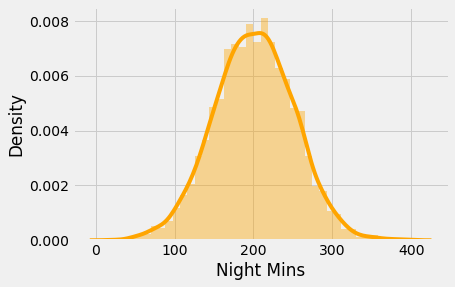

In [508]:
# Distribution of a Night Minutes.
sns.distplot(train['Night Mins'], color= 'orange')

#### FEATURE 16: Night Calls
Description: Number of Calls during Night

In [509]:
# How many missing values are there in Night Calls
train["Night Calls"].isnull().sum()

2

In [510]:
train[train['Night Calls'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2785,MN,38,510.00,0,0,0.00,175.70,109.00,29.87,211.80,97.00,18.00,137.90,NaN,6.21,9.20,3.00,2.48,5,1
2896,SD,55,415.00,0,0,0.00,245.50,130.00,41.74,192.70,54.00,16.38,141.70,NaN,NaN,9.10,4.00,2.46,1,0


In [511]:
## Average Number of Calls received by SD State with Area Code 415
SD_State = train[train['State'] == 'SD']
Average_Calls_SD = SD_State[SD_State['Area Code'] == 415.0]

print('Average Calls SD Received: ',np.round(Average_Calls_SD['Night Calls'].mean(), 1))

Average Calls SD Received:  96.8


In [512]:
## Average Number of Calls received by MN State with Area Code 510
MN_State = train[train['State'] == 'MN']
Average_Calls_MN = MN_State[MN_State['Area Code'] == 510.0]

print('Average Calls Received: ',np.round(Average_Calls_MN['Night Calls'].mean(), 1))

Average Calls Received:  100.3


In [513]:
train['Night Calls'].loc[2785] = np.round(Average_Calls_MN['Night Calls'].mean(), 1)
train['Night Calls'].loc[2896] = np.round(Average_Calls_SD['Night Calls'].mean(), 1)

<AxesSubplot:xlabel='Night Calls', ylabel='Density'>

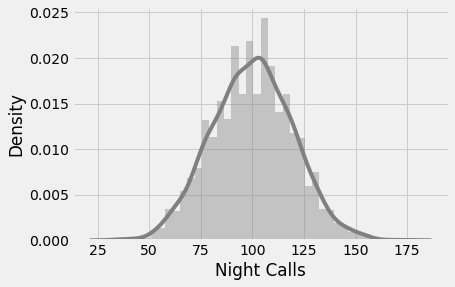

In [514]:
# Distribution of a Night Calls.
sns.distplot(train['Night Calls'], color= 'gray')

#### FEATURE 17: Night Charge
Description: Total Charge on Calls during Night

In [515]:
# How many missing values are there in Night Charges
train["Night Charge"].isnull().sum()

4

In [516]:
train[train['Night Charge'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
41,MD,135,408.00,1,1,41.00,173.10,85.00,29.43,203.90,107.00,17.33,122.20,78.00,NaN,14.60,15.00,3.94,0,1
2862,MA,126,408.00,0,1,24.00,58.90,125.00,10.01,305.50,90.00,25.97,158.90,73.00,NaN,12.10,6.00,3.27,0,0
2896,SD,55,415.00,0,0,0.00,245.50,130.00,41.74,192.70,54.00,16.38,141.70,96.80,NaN,9.10,4.00,2.46,1,0
3020,ND,127,415.00,0,1,23.00,182.00,80.00,30.94,216.10,85.00,18.37,156.90,82.00,NaN,9.80,4.00,2.65,1,0


In [517]:
## Obtaining all Details of SD and ND States with 415 Area Code
Area_Code = train[train['Area Code'] == 415.0]
SD_State = Area_Code[Area_Code['State'] == 'SD']
ND_State = Area_Code[Area_Code['State'] == 'ND']

In [518]:
## Obtaining all Details of MD and MA States with 408 Area Code
Area_Code2 = train[train['Area Code'] == 408.0]
MD_State = Area_Code2[Area_Code2['State'] == 'MD']
MA_State = Area_Code2[Area_Code2['State'] == 'MA']

#### SD and ND States

In [519]:
SD_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
309,SD,209,415.00,0,0,0.00,227.20,128.00,38.62,258.40,92.00,21.96,183.50,74.00,8.26,8.90,4.00,2.40,3,0
375,SD,87,415.00,0,1,21.00,214.00,113.00,36.38,180.00,114.00,15.30,134.50,82.00,6.05,10.60,5.00,2.86,0,0
500,SD,126,415.00,0,1,23.00,114.30,102.00,19.43,190.30,103.00,16.18,240.40,111.00,10.82,12.60,7.00,3.40,3,0
575,SD,114,415.00,0,1,36.00,309.90,90.00,52.68,200.30,89.00,17.03,183.50,105.00,8.26,14.20,2.00,3.83,1,0
714,SD,168,415.00,0,1,22.00,175.90,70.00,29.90,211.70,105.00,17.99,174.50,81.00,7.85,7.30,5.00,1.97,2,0


In [520]:
## Charge of a Call for 1 Minute
charge_SD = SD_State['Night Charge'].iloc[1]/SD_State['Night Mins'].iloc[1]
np.round(charge_SD,2)

0.04

In [521]:
ND_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
464,ND,105,415.00,0,1,23.00,193.50,85.00,32.90,220.20,90.00,18.72,272.40,111.00,12.26,8.50,5.00,2.30,0,0
640,ND,88,415.00,0,0,0.00,161.50,92.00,27.46,173.50,108.00,14.75,206.20,95.00,9.28,7.90,4.00,2.13,2,0
847,ND,70,415.00,0,1,31.00,125.90,101.00,21.40,196.40,102.00,16.69,252.70,75.00,11.37,10.30,4.00,2.78,1,0
982,ND,84,415.00,0,1,33.00,159.10,106.00,27.05,149.80,101.00,12.73,213.40,108.00,9.60,13.00,18.00,3.51,1,0
1012,ND,182,415.00,0,0,0.00,104.90,111.00,17.83,198.50,120.00,16.87,258.20,91.00,11.62,8.00,5.00,2.16,2,0


In [522]:
## Charge of a Call for 1 Minute
charge_ND = ND_State['Night Charge'].iloc[1]/ND_State['Night Mins'].iloc[1]
np.round(charge_ND,2)

0.05

In [523]:
## Filling Values for SD and ND States
for i in range(0,len(train)):
    if train['State'][i] == 'SD':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Night Mins'][i]*charge_SD,2)
            train['Night Charge'][i] = value
    elif  train['State'][i] == 'ND':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Night Mins'][i]*charge_ND,2)
            train['Night Charge'][i] = value
    else:
        pass

#### MD and MA States

In [524]:
MD_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
41,MD,135,408.00,1,1,41.00,173.10,85.00,29.43,203.90,107.00,17.33,122.20,78.00,NaN,14.60,15.00,3.94,0,1
79,MD,70,408.00,0,0,0.00,170.20,98.00,28.93,155.20,102.00,13.19,228.60,76.00,10.29,15.00,2.00,4.05,1,0
230,MD,93,408.00,1,0,0.00,312.00,109.00,53.04,129.40,100.00,11.00,217.60,74.00,9.79,10.50,2.00,2.84,0,1
494,MD,18,408.00,0,0,0.00,273.60,93.00,46.51,114.60,116.00,9.74,250.60,120.00,11.28,8.20,4.00,2.21,1,0
868,MD,42,408.00,0,0,0.00,196.50,89.00,33.41,241.30,123.00,20.51,143.20,105.00,6.44,4.00,7.00,1.08,0,0


In [525]:
## Charge of a Call for 1 Minute
charge_MD = MD_State['Night Charge'].iloc[1]/MD_State['Night Mins'].iloc[1]
np.round(charge_MD,2)

0.05

In [526]:
MA_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
269,MA,118,408.00,1,0,0.00,160.00,123.00,27.20,175.40,96.00,14.91,184.80,99.00,8.32,9.90,3.00,2.67,2,0
313,MA,73,408.00,0,0,0.00,94.10,136.00,16.00,280.30,122.00,23.83,205.00,77.00,9.23,9.80,4.00,2.65,0,0
315,MA,39,408.00,0,0,0.00,60.40,158.00,10.27,306.20,120.00,26.03,123.90,46.00,5.58,12.40,3.00,3.35,1,0
676,MA,42,408.00,0,0,0.00,241.20,134.00,41.00,116.50,114.00,9.90,152.20,91.00,6.85,10.60,4.00,2.86,0,0
773,MA,127,408.00,1,0,0.00,176.90,110.00,30.07,167.90,100.00,14.27,182.20,138.00,8.20,7.70,2.00,2.08,1,1


In [527]:
## Charge of a Call for 1 Minute
charge_MA = MA_State['Night Charge'].iloc[1]/MA_State['Night Mins'].iloc[1]
np.round(charge_MA,2)

0.05

In [528]:
## Filling Values for MD and MA States
for i in range(0,len(train)):
    if train['State'][i] == 'MD':
        if (train['Area Code'][i] == 408.0):
            value = np.round(train['Night Mins'][i]*charge_MD,2)
            train['Night Charge'][i] = value
    elif  train['State'][i] == 'MA':
        if (train['Area Code'][i] == 408.0):
            value = np.round(train['Night Mins'][i]*charge_MA,2)
            train['Night Charge'][i] = value
    else:
        pass

<AxesSubplot:xlabel='Night Charge', ylabel='Density'>

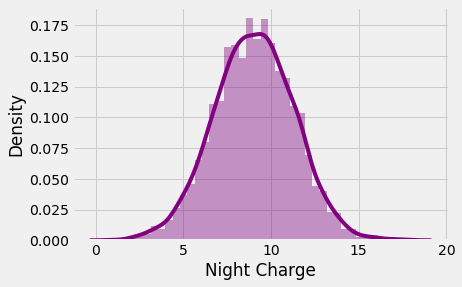

In [529]:
# Distribution of a Day Charge.
sns.distplot(train['Night Charge'], color= 'purple')

#### FEATURE 18: International Mins
Description: Total Time spent on Voice Call during International

In [530]:
# How many missing values are there in International Minutes
train["Intl Mins"].isnull().sum()

4

In [531]:
train[train['Intl Mins'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
16,ID,85,408.00,0,1,27.00,196.40,139.00,33.39,280.90,90.00,23.88,89.30,75.00,4.02,NaN,4.00,3.73,1,0
54,WY,87,415.00,0,0,0.00,151.00,83.00,25.67,219.70,116.00,18.67,203.90,127.00,9.18,NaN,3.00,2.62,5,1
2806,MA,13,408.00,0,0,0.00,220.40,100.00,37.47,211.20,79.00,17.95,259.30,112.00,11.67,NaN,8.00,3.67,2,0
2965,WI,103,415.00,0,0,0.00,180.20,134.00,30.63,97.70,85.00,8.30,181.70,134.00,8.18,NaN,3.00,2.27,1,0


In [532]:
## Obtaining all Details of WY and WI States with 415 Area Code
Area_Code = train[train['Area Code'] == 415.0]
WY_State = Area_Code[Area_Code['State'] == 'WY']
WI_State = Area_Code[Area_Code['State'] == 'WI']

## Obtaining all Details of IS and MA States with 408 Area Code
Area_Code2 = train[train['Area Code'] == 408.0]
ID_State = Area_Code2[Area_Code2['State'] == 'ID']
MA_State = Area_Code2[Area_Code2['State'] == 'MA']

#### States with 415 Area Code

In [533]:
WY_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
49,WY,97,415.00,0,1,24.00,133.20,135.00,22.64,217.20,58.00,18.46,70.60,79.00,3.18,11.00,3.00,2.97,1,0
54,WY,87,415.00,0,0,0.00,151.00,83.00,25.67,219.70,116.00,18.67,203.90,127.00,9.18,NaN,3.00,2.62,5,1
66,WY,43,415.00,1,0,0.00,251.50,105.00,42.76,212.80,104.00,18.09,157.80,67.00,7.10,9.30,4.00,2.51,0,0
273,WY,139,415.00,0,0,0.00,192.80,104.00,32.78,234.40,96.00,19.92,203.20,101.00,9.14,13.00,3.00,3.51,3,0
321,WY,114,415.00,0,1,32.00,125.20,79.00,21.28,177.80,105.00,15.11,232.40,89.00,10.46,12.90,3.00,3.48,1,0


In [534]:
## Charge of a Call for 1 Minute
charge_WY = WY_State['Intl Charge'].iloc[0]/WY_State['Intl Mins'].iloc[0]
np.round(charge_WY,2)

0.27

In [535]:
WI_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
58,WI,68,415.00,0,0,0.00,148.80,70.00,25.30,246.50,164.00,20.95,129.80,103.00,5.84,12.10,3.00,3.27,3,0
346,WI,81,415.00,0,1,33.00,161.60,117.00,27.47,123.00,90.00,10.46,261.30,101.00,11.76,12.20,5.00,3.29,1,0
388,WI,85,415.00,0,0,0.00,102.00,95.00,17.34,270.20,139.00,22.97,148.20,105.00,6.67,10.70,3.00,2.89,1,0
405,WI,92,415.00,1,0,0.00,264.30,91.00,44.93,160.90,115.00,13.68,198.60,73.00,8.94,9.30,5.00,2.51,0,0
572,WI,44,415.00,1,0,0.00,62.30,92.00,10.59,275.00,82.00,23.38,138.70,108.00,6.24,10.80,3.00,2.92,1,0


In [536]:
## Charge of a Call for 1 Minute
charge_WI = WI_State['Intl Charge'].iloc[0]/WI_State['Intl Mins'].iloc[0]
np.round(charge_WI,2)

0.27

In [537]:
for i in range(0,len(train)):
    if train['State'][i] == 'WY':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Intl Charge'][i]/charge_WY,2)
            train['Intl Mins'][i] = value
    elif  train['State'][i] == 'WI':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Intl Charge'][i]/charge_WI,2)
            train['Intl Mins'][i] = value
    else:
        pass

#### States with 408 Area Code

In [538]:
ID_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
16,ID,85,408.00,0,1,27.00,196.40,139.00,33.39,280.90,90.00,23.88,89.30,75.00,4.02,NaN,4.00,3.73,1,0
60,ID,174,408.00,0,0,0.00,192.10,97.00,32.66,169.90,94.00,14.44,166.60,54.00,7.50,11.40,4.00,3.08,1,0
119,ID,97,408.00,0,0,0.00,239.80,125.00,40.77,214.80,111.00,18.26,143.30,81.00,6.45,8.70,5.00,2.35,2,0
314,ID,128,408.00,0,0,0.00,125.20,99.00,21.28,205.40,107.00,17.46,254.40,111.00,11.45,18.90,2.00,5.10,0,0
479,ID,99,408.00,0,0,0.00,190.40,102.00,32.37,158.10,107.00,13.44,271.50,92.00,12.22,11.20,4.00,3.02,2,0


In [539]:
## Charge of a Call for 1 Minute
charge_ID = ID_State['Intl Charge'].iloc[1]/ID_State['Intl Mins'].iloc[1]
np.round(charge_ID,2)

0.27

In [540]:
MA_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
269,MA,118,408.00,1,0,0.00,160.00,123.00,27.20,175.40,96.00,14.91,184.80,99.00,8.32,9.90,3.00,2.67,2,0
313,MA,73,408.00,0,0,0.00,94.10,136.00,16.00,280.30,122.00,23.83,205.00,77.00,9.23,9.80,4.00,2.65,0,0
315,MA,39,408.00,0,0,0.00,60.40,158.00,10.27,306.20,120.00,26.03,123.90,46.00,5.58,12.40,3.00,3.35,1,0
676,MA,42,408.00,0,0,0.00,241.20,134.00,41.00,116.50,114.00,9.90,152.20,91.00,6.85,10.60,4.00,2.86,0,0
773,MA,127,408.00,1,0,0.00,176.90,110.00,30.07,167.90,100.00,14.27,182.20,138.00,8.20,7.70,2.00,2.08,1,1


In [541]:
## Charge of a Call for 1 Minute
charge_MA = MA_State['Intl Charge'].iloc[0]/MA_State['Intl Mins'].iloc[0]
np.round(charge_MA,2)

0.27

In [542]:
for i in range(0,len(train)):
    if train['State'][i] == 'ID':
        if (train['Area Code'][i] == 408.0):
            value = np.round(train['Intl Charge'][i]/charge_ID,2)
            train['Intl Mins'][i] = value
    elif  train['State'][i] == 'MA':
        if (train['Area Code'][i] == 408.0):
            value = np.round(train['Intl Charge'][i]/charge_MA,2)
            train['Intl Mins'][i] = value
    else:
        pass

<AxesSubplot:xlabel='Intl Mins', ylabel='Density'>

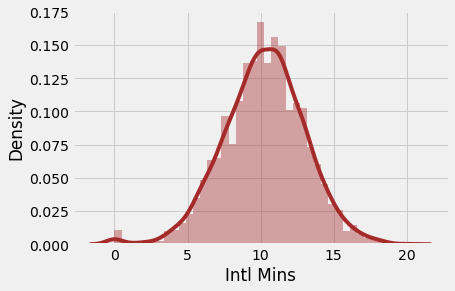

In [543]:
# Distribution of a International Minutes.
sns.distplot(train['Intl Mins'], color= 'brown')

#### FEATURE 19: International Calls
Description: Number of Calls during International

In [544]:
# How many missing values are there in International Calls
train["Intl Calls"].isnull().sum()

1

In [545]:
train[train['Intl Calls'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2993,OR,161,408.00,0,0,0.00,196.60,73.00,33.42,170.20,79.00,14.47,194.30,79.00,8.74,12.50,NaN,3.38,1,0


In [546]:
## Average Number of Calls received by the States with respective Area Codes
OR_State = train[train['State'] == 'OR']
Average_Calls_OR = OR_State[OR_State['Area Code'] == 408.0]

print('Average Calls OR Received: ',np.round(Average_Calls_OR['Intl Calls'].mean(), 1))

Average Calls OR Received:  4.0


In [547]:
## Filling Missing Values with the Average Calls Received for respective State
train['Intl Calls'].loc[2993] = 4.0

<AxesSubplot:xlabel='Intl Calls', ylabel='Density'>

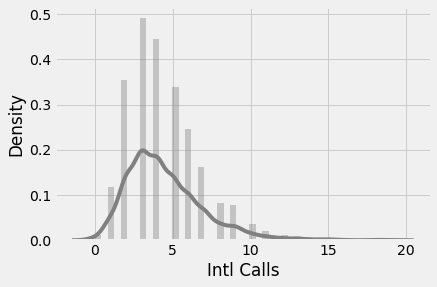

In [548]:
# Distribution of a International Charge.
sns.distplot(train['Intl Calls'], color= 'gray')

#### FEATURE 20: International Charges
Description: Total Charge on Calls during International

In [549]:
# How many missing values are there in International Charges
train["Intl Charge"].isnull().sum()

2

In [550]:
train[train['Intl Charge'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2963,ID,113,415.00,0,1,30.00,183.80,102.00,31.25,183.40,123.00,15.59,235.00,52.00,10.58,11.60,7.00,NaN,0,0
3017,AL,141,408.00,0,0,0.00,242.80,90.00,41.28,234.10,80.00,19.90,211.50,104.00,9.52,6.00,3.00,NaN,5,0


In [551]:
## Obtaining all Details of ID State with 415 Area Code
Area_Code = train[train['Area Code'] == 415.0]
ID_State = Area_Code[Area_Code['State'] == 'ID']

In [552]:
## Obtaining all Details of AL State with 408 Area Code
Area_Code2 = train[train['Area Code'] == 408.0]
AL_State = Area_Code2[Area_Code2['State'] == 'AL']

In [553]:
ID_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
43,ID,160,415.00,0,0,0.00,85.80,77.00,14.59,165.30,110.00,14.05,178.50,92.00,8.03,9.20,4.00,2.48,3,0
48,ID,119,415.00,0,0,0.00,159.10,114.00,27.05,231.30,117.00,19.66,143.20,91.00,6.44,8.80,3.00,2.38,5,1
99,ID,77,415.00,0,0,0.00,251.80,72.00,42.81,205.70,126.00,17.48,275.20,109.00,12.38,9.80,7.00,2.65,2,1
234,ID,92,415.00,1,0,0.00,173.10,140.00,29.43,240.30,105.00,20.43,233.20,117.00,10.49,9.00,5.00,2.43,1,0
401,ID,74,415.00,0,0,0.00,221.10,124.00,37.59,110.80,94.00,9.42,240.10,112.00,10.80,10.60,3.00,2.86,0,0


In [554]:
## Charge of a Call for 1 Minute
charge_ID = ID_State['Intl Charge'].iloc[1]/ID_State['Intl Mins'].iloc[1]
np.round(charge_ID,2)

0.27

In [555]:
AL_State.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
112,AL,98,408.00,0,0,0.00,161.00,117.00,27.37,190.90,113.00,16.23,227.70,113.00,10.25,12.10,4.00,3.27,4,0
326,AL,121,408.00,0,1,35.00,68.70,95.00,11.68,209.20,69.00,17.78,197.40,42.00,8.88,11.40,4.00,3.08,1,0
450,AL,85,408.00,0,0,0.00,127.90,107.00,21.74,271.20,124.00,23.05,202.20,76.00,9.10,12.50,5.00,3.38,0,0
514,AL,60,408.00,1,1,29.00,265.90,113.00,45.20,215.80,94.00,18.34,108.10,82.00,4.86,14.00,12.00,3.78,0,1
540,AL,47,408.00,0,1,28.00,141.30,94.00,24.02,168.00,108.00,14.28,113.50,84.00,5.11,7.80,2.00,2.11,1,0


In [556]:
## Charge of a Call for 1 Minute
charge_AL = AL_State['Intl Charge'].iloc[1]/AL_State['Intl Mins'].iloc[1]
np.round(charge_AL,2)

0.27

In [557]:
for i in range(0,len(train)):
    if train['State'][i] == 'ID':
        if (train['Area Code'][i] == 415.0):
            value = np.round(train['Intl Mins'][i]*charge_ID,2)
            train['Intl Charge'][i] = value
    elif  train['State'][i] == 'AL':
        if (train['Area Code'][i] == 408.0):
            value = np.round(train['Intl Mins'][i]*charge_AL,2)
            train['Intl Charge'][i] = value
    else:
        pass

<AxesSubplot:xlabel='Intl Charge', ylabel='Density'>

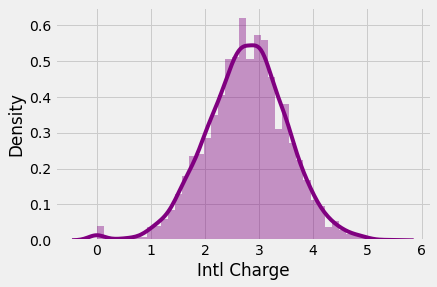

In [558]:
# Distribution of a Day Charge.
sns.distplot(train['Intl Charge'], color= 'purple')

#### FEATURE 21: Customer Service Calls
Description: Number of Customer Service Calls

In [559]:
# How many missing values are there in Eve Calls
train["CustServ Calls"].isnull().sum()

0

<AxesSubplot:xlabel='CustServ Calls', ylabel='Density'>

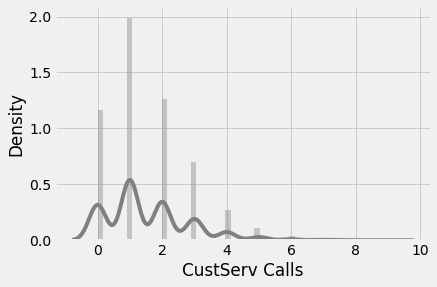

In [560]:
# Distribution of a Customer Service Calls.
sns.distplot(train['CustServ Calls'], color= 'gray')

In [561]:
## Checking For any more Missing Values
train.isnull().sum()

State             0
Account Length    0
Area Code         0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          1
Eve Calls         0
Eve Charge        1
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [562]:
train[train['Eve Mins'].isnull() == True]

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2921,NE,80,415.00,0,0,0.00,127.80,67.00,21.73,NaN,112.00,NaN,197.30,63.00,8.88,15.90,2.00,4.29,2,0


- We can drop this as they can't be filled with the current method

In [563]:
train.dropna(axis= 0, how= 'any', inplace= True)

In [564]:
train.drop('State', axis= 1, inplace= True)
train.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415.00,0,1,25.00,265.10,110.00,45.07,197.40,99.00,16.78,244.70,91.00,11.01,10.00,3.00,2.70,1,0
1,107,415.00,0,1,26.00,161.60,123.00,27.47,195.50,103.00,16.62,254.40,103.00,11.45,13.70,3.00,3.70,1,0
2,137,415.00,0,0,0.00,243.40,114.00,41.38,121.20,110.00,10.30,162.60,104.00,7.32,12.20,5.00,3.29,0,0
3,84,408.00,1,0,0.00,299.40,71.00,50.90,61.90,88.00,5.26,196.90,89.00,8.86,6.60,7.00,1.78,2,0
4,75,415.00,1,0,0.00,166.70,113.00,28.34,148.30,122.00,12.61,186.90,121.00,8.41,10.10,3.00,2.73,3,0


In [565]:
# Viewing the train dataset
print("Dimensionality of the Train dataset: ", train.shape)

Dimensionality of the Train dataset:  (3026, 19)


### **Bivariate Analysis**

### Outlier Detection and Treatment

Text(0.5, 0, 'Features')

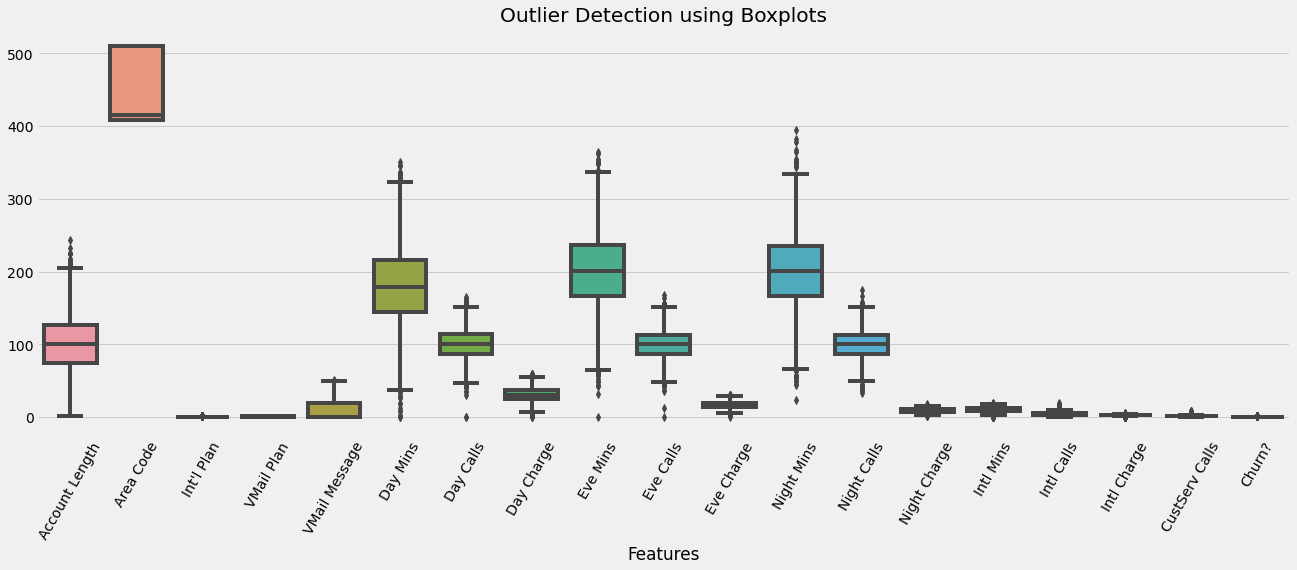

In [566]:
plt.figure(figsize= (20, 7))
sns.boxplot(data= train)

plt.title('Outlier Detection using Boxplots')
plt.xticks(rotation= 60)
plt.xlabel('Features')

In [567]:
columns= ['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins','Eve Calls', 'Eve Charge', 'Night Mins', 
        'Night Calls', 'Night Charge','Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']

## Z-Score Capping --> When Feature follows Normal Distibution.
for col in columns:
        mean = train[col].mean()
        std = train[col].std()

        Upper_Bound = mean + (3*std)
        Lower_Bound = mean - (3*std)

        train[col][train[col] < Lower_Bound] = Lower_Bound
        train[col][train[col] > Upper_Bound] = Upper_Bound

### Correlation

<AxesSubplot:>

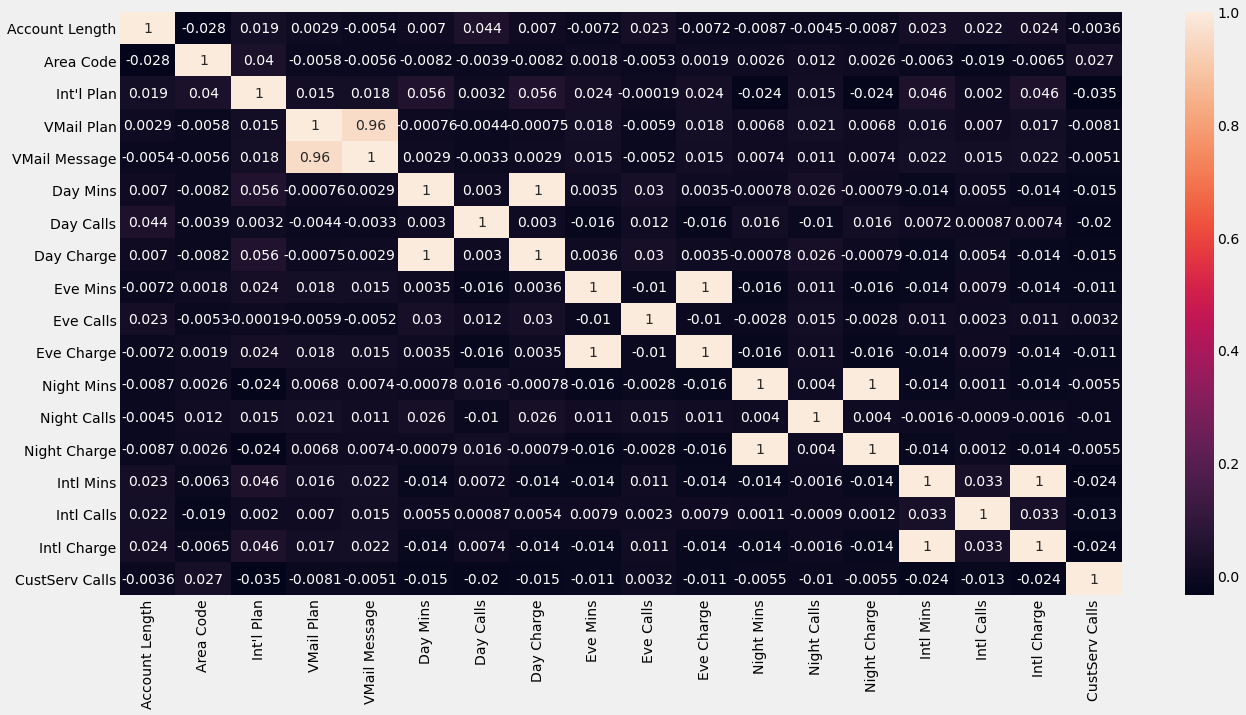

In [568]:
correlation = train.drop('Churn?', axis= 1).corr()

plt.figure(figsize= (20, 10))
sns.heatmap(correlation, annot= True)

- **We know that the Call Charges are based on the Mins the Customer Spoke. So there will be an obvious relationship here. Thus we will not be considering them as a case of Multi-Colinearity.**

In [569]:
### Removing highly correlated Features. (With respect to the Independent Features)
threshold = 0.8

# Finding and Removing Correlated Features (Krish Naik).
def correlation(dataset, threshold):
    col_corr = set() ## Set of all the names of the Correlated Columns.
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # We are interested in the Absolute Coefficient value.
                colname = corr_matrix.columns[i] # getting the name of the column
                col_corr.add(colname)
    return col_corr

correlation(train.drop('Churn?', axis= 1), threshold)

{'Day Charge', 'Eve Charge', 'Intl Charge', 'Night Charge', 'VMail Message'}

In [570]:
newtrain = train.drop(columns= ['VMail Message'])
newtrain.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128.00,415.00,0,1,265.10,110.00,45.07,197.40,99.00,16.78,244.70,91.00,11.01,10.00,3.00,2.70,1.00,0
1,107.00,415.00,0,1,161.60,123.00,27.47,195.50,103.00,16.62,254.40,103.00,11.45,13.70,3.00,3.70,1.00,0
2,137.00,415.00,0,0,243.40,114.00,41.38,121.20,110.00,10.30,162.60,104.00,7.32,12.20,5.00,3.29,0.00,0
3,84.00,408.00,1,0,299.40,71.00,50.90,61.90,88.00,5.26,196.90,89.00,8.86,6.60,7.00,1.78,2.00,0
4,75.00,415.00,1,0,166.70,113.00,28.34,148.30,122.00,12.61,186.90,121.00,8.41,10.10,3.00,2.73,3.00,0


---

## 3. Feature Encoding

- We will not be doing any Feature Scaling for this process. 

In [571]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

newtrain['Area Code'] = encoder.fit_transform(newtrain['Area Code'])
newtrain.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128.00,1,0,1,265.10,110.00,45.07,197.40,99.00,16.78,244.70,91.00,11.01,10.00,3.00,2.70,1.00,0
1,107.00,1,0,1,161.60,123.00,27.47,195.50,103.00,16.62,254.40,103.00,11.45,13.70,3.00,3.70,1.00,0
2,137.00,1,0,0,243.40,114.00,41.38,121.20,110.00,10.30,162.60,104.00,7.32,12.20,5.00,3.29,0.00,0
3,84.00,0,1,0,299.40,71.00,50.90,61.90,88.00,5.26,196.90,89.00,8.86,6.60,7.00,1.78,2.00,0
4,75.00,1,1,0,166.70,113.00,28.34,148.30,122.00,12.61,186.90,121.00,8.41,10.10,3.00,2.73,3.00,0


---

## 4. Feature Selection

This is more of a Numerical (input) to Categorical Target (output)

In [572]:
## Capture the Independent Variables and Dependent Variable
X = newtrain.drop('Churn?', axis= 1)
y = newtrain['Churn?']

### 4.2 ANOVA Feature Selection Technique

In [573]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

Feature 2: 223.528685
Feature 3: 27.714603
Feature 4: 133.573771
Feature 6: 133.567314
Feature 7: 25.879089
Feature 9: 25.868704
Feature 13: 13.822228
Feature 15: 13.820263
Feature 16: 112.437846


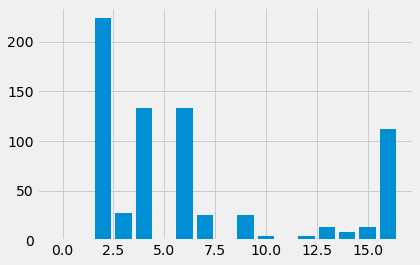

In [574]:
# Configure to Select all Features
fs = SelectKBest(score_func= f_classif, k= 'all')

# Learn Relationship from Training Data
fs.fit(X, y)

# Transform Train Input data
X_fs = fs.transform(X)

import matplotlib.pyplot as plt
# Lets keep the Importance Threshold above 10
for i in range(len(fs.scores_)):
    if (fs.scores_[i] > 10):
        print('Feature %d: %f' % (i, fs.scores_[i]))

# Plot all the Feature Scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [575]:
X = newtrain.iloc[:, [2,3,4,6,7,9,13,15,16]]
X.head()

,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Charge,Intl Mins,Intl Charge,CustServ Calls
0,0,1,265.10,45.07,197.40,16.78,10.00,2.70,1.00
1,0,1,161.60,27.47,195.50,16.62,13.70,3.70,1.00
2,0,0,243.40,41.38,121.20,10.30,12.20,3.29,0.00
3,1,0,299.40,50.90,61.90,5.26,6.60,1.78,2.00
4,1,0,166.70,28.34,148.30,12.61,10.10,2.73,3.00


---

## 5. Model Selection and Model Building

In [576]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import cross_val_score

### Balance the Data

In [577]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [578]:
os= SMOTETomek(0.75)
X_bal, y_bal = os.fit_sample(X, y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_bal)))

The number of classes before fit Counter({0: 2587, 1: 439})
The number of classes after fit Counter({0: 2492, 1: 1845})


In [579]:
## Splitting into Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size= 0.2, random_state = 100)

In [580]:
classifier = LazyClassifier(verbose= 0, ignore_warnings= True, custom_metric= None)
models ,predictions = classifier.fit(X_train, X_test, y_train, y_test)

models.head(10)

100%|██████████| 29/29 [00:19<00:00,  1.45it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.95,0.95,0.95,0.95,1.31
LGBMClassifier,0.95,0.95,0.95,0.95,0.80
BaggingClassifier,0.94,0.94,0.94,0.94,0.50
RandomForestClassifier,0.94,0.94,0.94,0.94,2.29
ExtraTreesClassifier,0.94,0.93,0.93,0.94,1.34
DecisionTreeClassifier,0.91,0.91,0.91,0.91,0.13
AdaBoostClassifier,0.89,0.89,0.89,0.89,1.07
ExtraTreeClassifier,0.88,0.88,0.88,0.88,0.08
LabelSpreading,0.87,0.87,0.87,0.87,2.92


### XGBoost Classifier (Without Parameter Tuning)

In [584]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn import model_selection, tree, preprocessing, metrics, linear_model

In [587]:
start_time = time.time()
algorithm = XGBClassifier()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
xgb_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
xgb_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
xgb_acc_cv = round(metrics.accuracy_score(y_train, xgb_train_pred)*100, 2)

xgb_precision = round(metrics.precision_score(y_train, xgb_train_pred)*100, 2)
xgb_recall = round(metrics.recall_score(y_train, xgb_train_pred)*100, 2)
xgb_f1score = round(metrics.f1_score(y_train, xgb_train_pred)*100, 2)

xgb_time = (time.time()- start_time)

In [588]:
# XGBoost Classifier
print('Accuracy of the model is: ', xgb_acc)
print('Accuracy of 10-Fold CV is: ', xgb_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= xgb_time))
print()
print('Precision of the model is: ', xgb_precision)
print('Recall of the model is: ', xgb_recall)
print('F1-Score of the model is: ', xgb_f1score)

Accuracy of the model is:  99.71
Accuracy of 10-Fold CV is:  93.69
Running time is:  0:00:39.299105

Precision of the model is:  94.08
Recall of the model is:  90.65
F1-Score of the model is:  92.33


In [592]:
## Prediction on Validation Data
y_pred = model.predict(X_test)

print('Accuracy of the model is: ', round(metrics.accuracy_score(y_test, y_pred)*100,2))
print()
print('Precision of the model is: ', round(metrics.precision_score(y_test, y_pred)*100,2))
print('Recall of the model is: ', round(metrics.recall_score(y_test, y_pred)*100,2))
print('F1 Score of the model is: ', round(metrics.f1_score(y_test, y_pred)*100,2))

Accuracy of the model is:  95.05

Precision of the model is:  95.54
Recall of the model is:  93.33
F1 Score of the model is:  94.42


---

## 6. Prediction on Unseen Data

In [614]:
test.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,WV,101,415,367-9127,no,yes,28,220.30,96,37.45,285.80,72,24.29,203.00,111,9.14,9.40,6,2.54,4
1,NV,129,415,420-3028,no,no,0,150.00,98,25.50,232.40,101,19.75,261.20,123,11.75,12.50,6,3.38,1
2,MA,67,415,357-6348,no,yes,34,161.70,114,27.49,207.60,115,17.65,205.70,114,9.26,9.20,4,2.48,0


In [613]:
## Checking for Missing Values
test.isnull().any()

State             False
Account Length    False
Area Code         False
Phone             False
Int'l Plan        False
VMail Plan        False
VMail Message     False
Day Mins          False
Day Calls         False
Day Charge        False
Eve Mins          False
Eve Calls         False
Eve Charge        False
Night Mins        False
Night Calls       False
Night Charge      False
Intl Mins         False
Intl Calls        False
Intl Charge       False
CustServ Calls    False
dtype: bool

#### Final Prediction on the Test Dataset

In [605]:
wanted = X.columns
wanted

Index(['Int'l Plan', 'VMail Plan', 'Day Mins', 'Day Charge', 'Eve Mins',
       'Eve Charge', 'Intl Mins', 'Intl Charge', 'CustServ Calls'],
      dtype='object')

In [606]:
## Preporcessing the Test Data
NewTest = test[wanted]
NewTest["Int'l Plan"] = encoder.fit_transform(NewTest["Int'l Plan"])
NewTest["VMail Plan"] = encoder.fit_transform(NewTest["VMail Plan"])

NewTest.head()

,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Charge,Intl Mins,Intl Charge,CustServ Calls
0,0,1,220.30,37.45,285.80,24.29,9.40,2.54,4
1,0,0,150.00,25.50,232.40,19.75,12.50,3.38,1
2,0,1,161.70,27.49,207.60,17.65,9.20,2.48,0
3,0,0,191.40,32.54,167.40,14.23,14.00,3.78,3
4,1,0,146.70,24.94,148.30,12.61,12.50,3.38,3


In [607]:
## Prediction on Test Data
predictions = model.predict(NewTest)

In [608]:
# Create a DataFrame and append the relevant columns.
submission = pd.DataFrame()
submission['Churn?'] = predictions

submission.head()

,Churn?
0,0
1,0
2,0
3,0
4,0


In [626]:
submission['Churn?'].value_counts()

0    256
1     50
Name: Churn?, dtype: int64

In [625]:
# Convert Submission DataFrame to csv.
submission.to_csv('Submission.csv', index= False)
print('Submission csv is ready')

Submission csv is ready
